In [1]:
import pandas as pd
import glob

# Procesamiento de datos

In [2]:
resultados=pd.read_csv("data/Ejercicio_salida/resultados.csv")
resultados

,Unnamed: 0,0,1
0,0,data/ejercicio\1\paraphraseGPT2.csv,"[0.5722274092527536, 0.6666666681949909]"
1,1,data/ejercicio\2\TEST_new_1_0.csv,"[0.46525493174603405, 0.8276873441766235]"


In [3]:
resultados=resultados.assign(grupo=0.0)
resultados=resultados.assign(error=0.0)
resultados=resultados.assign(accuracy=0.0)

In [4]:
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/ejercicio\1\paraphraseGPT2.csv,"[0.5722274092527536, 0.6666666681949909]",0.0,0.0,0.0
1,1,data/ejercicio\2\TEST_new_1_0.csv,"[0.46525493174603405, 0.8276873441766235]",0.0,0.0,0.0


In [5]:
temp=resultados.copy()
for index,strings in temp.iterrows():
    resultados.at[index,'grupo']=100
    resultados.at[index,'error']=float(strings[2].split(',')[0][1:])
    resultados.at[index,'accuracy']=float(strings[2].split(',')[1][:-1])
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/ejercicio\1\paraphraseGPT2.csv,"[0.5722274092527536, 0.6666666681949909]",100.0,0.572227,0.666667
1,1,data/ejercicio\2\TEST_new_1_0.csv,"[0.46525493174603405, 0.8276873441766235]",100.0,0.465255,0.827687


array([<AxesSubplot:title={'center':'error'}, xlabel='grupo'>,
       <AxesSubplot:title={'center':'accuracy'}, xlabel='grupo'>],
      dtype=object)

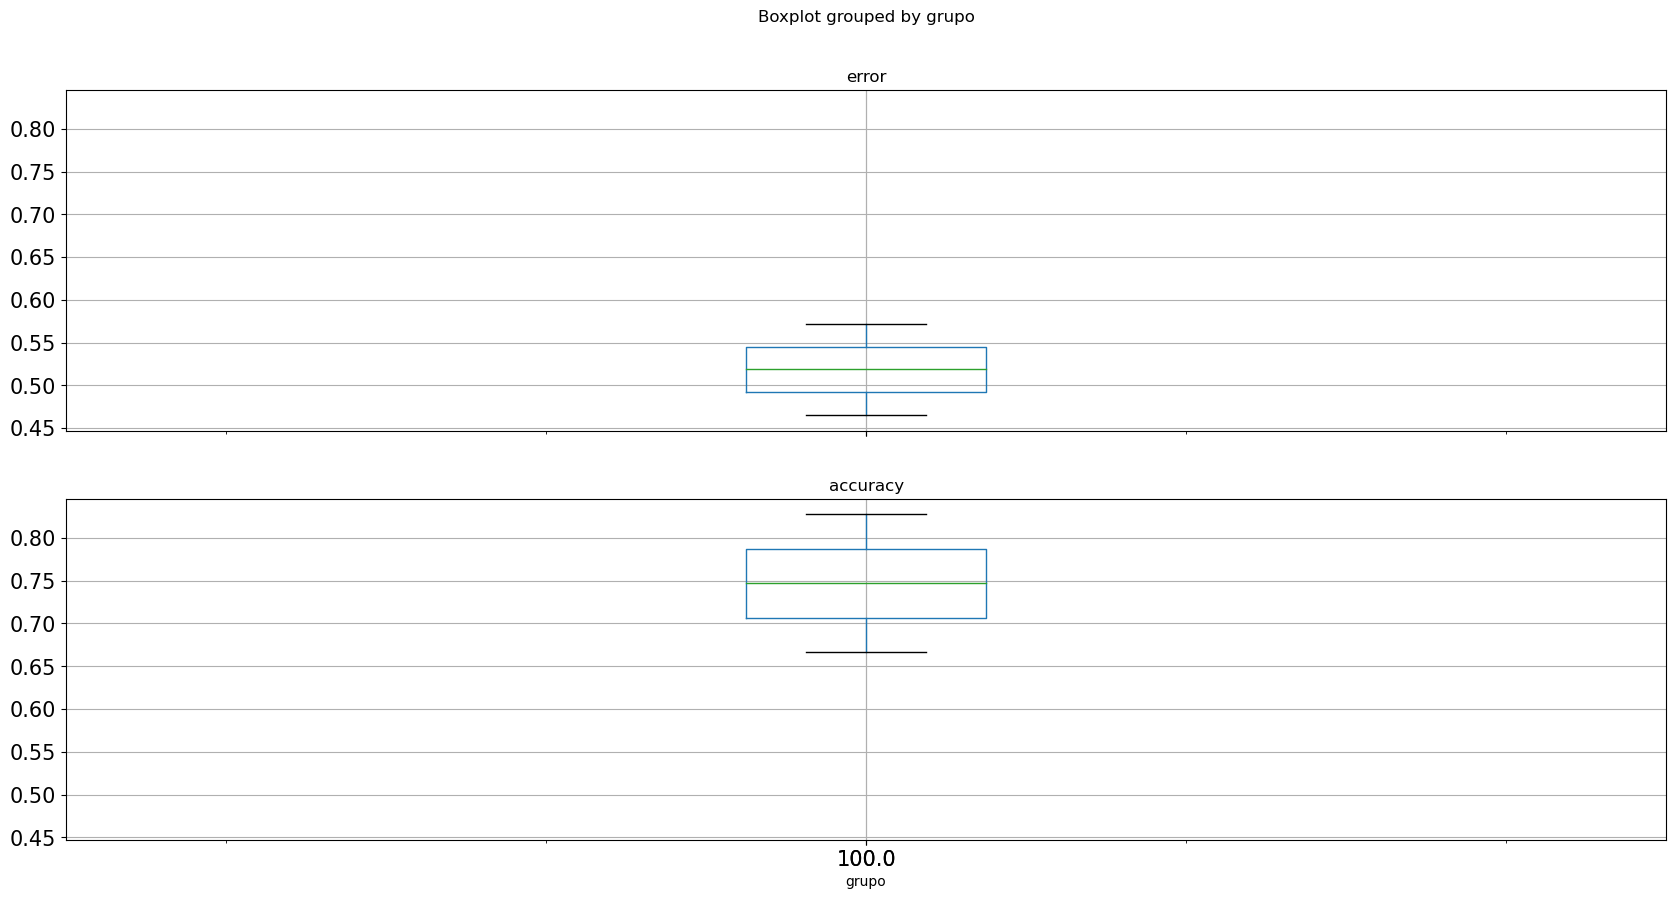

In [6]:
resultados.boxplot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=15,figsize=(20,10))
#resultados.boxplot(by='grupo')

<Figure size 1000x600 with 0 Axes>

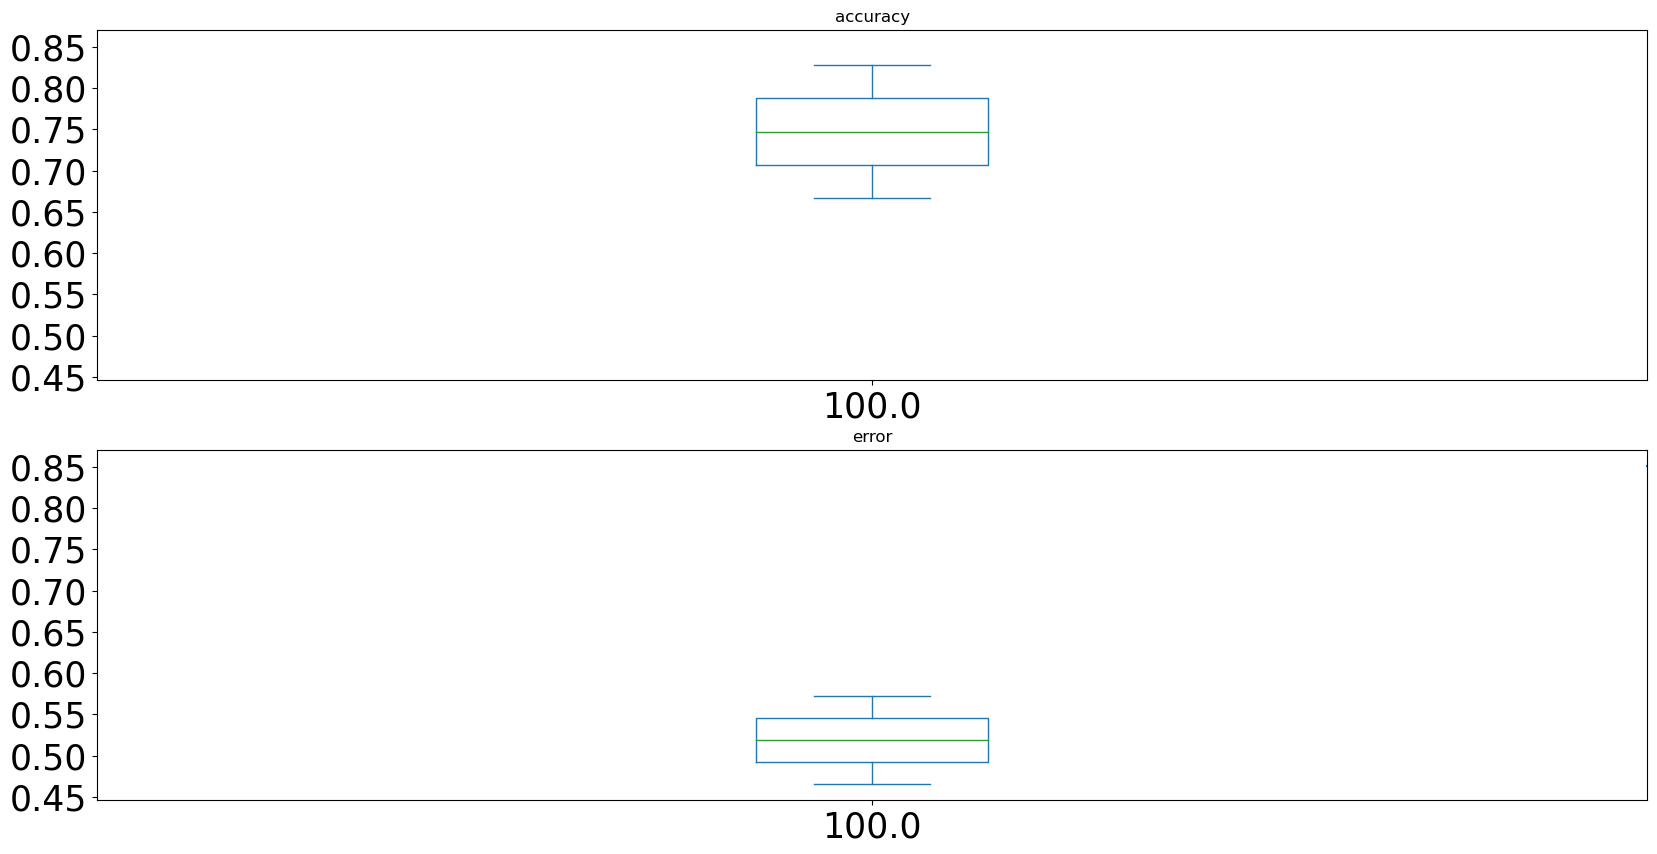

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
resultados.plot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=25,figsize=(20,10),subplots=True, 
    sharey=True,kind='box')
plt.axhline(y=0.85073, xmin=1, xmax=100)
plt.subplots_adjust(wspace=0.5)
plt.show()

# Del corpus base vamos a quitar los del test y solo comparar con los de paráfraseo

In [8]:
a=glob.glob('data/Ejercicio_salida/*.pickle')
a[0]

'data/Ejercicio_salida\\pparaphraseGPT2.csv.pickle'

In [9]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [10]:
f=pd.read_pickle(a[0])
f

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,...,Permute1,Dot1,Dot2,Dot3,Concatenate1,Concatenate2,Concatenate3,Dense1,Dense2,Dense3
0,0,"[NULL{null,ADJ}, during{during,ADP}, calf{calf...","[NULL{null,ADJ}, two{two,NUM}, ropes{rope,NOUN...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.79915404, 0.0969782, 0.10386772]","[0.0, 0.0, 1.0]",1,46,...,"[[0.0, 0.15460679, 0.24332292, 0.0, 0.21481226...","[[0.085589595, 0.08687423, 0.11177806, 0.01119...","[[0.0037927814, 0.018515661, 0.0072255763, -0....","[[0.010334241, 0.03004357, 0.022554463, 0.0263...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.0014557306, 0.0045953174, 0.008775115, 0.00...","[-0.007145353, -0.008234207, 0.019761581, 0.03...","[-0.12702453, -0.17648599, -0.3797095, -0.1700...","[0.79915404, 0.0969782, 0.10386772]"
1,1,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, atting{att,VE...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.86828756, 0.0975237, 0.034188654]","[1.0, 0.0, 0.0]",1,51,...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.085589595, 0.004343943, 0.10271191, 0.1707...","[[0.014433025, 0.017670587, 0.021984495, 0.028...","[[-0.011814563, 0.0029514479, 0.013008054, 0.0...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.0038468672, 0.0029503957, 0.015568373, 0.00...","[-0.0066945143, 0.008950197, 0.01598247, 0.037...","[-0.09668905, -0.15504584, -0.33912063, -0.144...","[0.86828756, 0.0975237, 0.034188654]"
2,2,"[NULL{null,ADJ}, two{two,NUM}, children{child,...","[NULL{null,ADJ}, two{two,NUM}, children{child,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.0030106155, 0.108720474, 0.8882689]","[0.0, 0.0, 1.0]",1,54,...,"[[0.0, 0.15460679, 0.32442102, 0.0, 0.16137342...","[[0.085589595, 0.08687423, 0.17383246, 0.17841...","[[-0.009646644, 0.0070288624, 0.019012526, -0....","[[0.0025440282, 0.026708143, 0.027392479, 0.03...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.018792551, 0.0015581734, 0.011366555, 0.010...","[0.12228833, 0.013688242, -0.08496657, 0.02432...","[-0.23351684, -0.2971719, -0.3720535, -0.24794...","[0.0030106155, 0.108720474, 0.8882689]"
3,3,"[NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...","[NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.059513114, 0.27876988, 0.66171706]","[0.0, 1.0, 0.0]",1,67,...,"[[0.0, 0.060077038, 0.0, 0.0, 0.0, -0.0, -0.0,...","[[0.085589595, 0.27504116, 0.03528291, 0.01402...","[[-0.003023356, -0.02390951, -0.009011541, 0.0...","[[-0.060991965, -0.06746966, -0.03159735, 0.02...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.0, 0.0, 0.014878441, 0.0, 0.0, 0.00655341, ...","[0.106767654, 0.046194203, -0.055947304, 0.014...","[-0.24562596, -0.3573436, -0.51599675, -0.3117...","[0.059513114, 0.27876988, 0.66171706]"
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, a{a,DET}, pretty{pretty,ADV...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.30659792, 0.46114442, 0.23225765]","[0.0, 1.0, 0.0]",1,85,...,"[[0.0, 0.0, 0.0, 0.0, 0.24774043, 0.0, 0.0, 0....","[[0.085589595, 0.014024382, 0.14292027, 0.1716...","[[0.005923141, 0.009952248, 0.017274942,

In [11]:
print(len(f.Text[0]),f.Text[0])
print(len(f.Hipotesis[0]),f.Hipotesis[0])

11 ['NULL{null,ADJ}', 'during{during,ADP}', 'calf{calf,NOUN}', 'roping{rope,VERB}', 'a{a,DET}', 'cowboy{cowboy,NOUN}', 'calls{call,VERB}', 'off{off,ADP}', 'his{-PRON-,ADJ}', 'horse{horse,NOUN}', '.{.,PUNCT}']
7 ['NULL{null,ADJ}', 'two{two,NUM}', 'ropes{rope,NOUN}', 'are{be,VERB}', 'calf{calf,NOUN}', 'successfully{successfully,ADV}', '.{.,PUNCT}']


In [12]:
#La entrada 1 pertenece al Texto
E_input1 =pd.DataFrame(f.Input1[0])
E_input1

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.016083,0.077161,-0.013422,0.001833,0.059955,0.068233,0.009992,0.096850,-0.001537,-0.003252,...,-0.062261,-0.014013,-0.080117,-0.026548,-0.087035,-0.028204,-0.020990,0.008751,0.013067,0.015846
1,0.006227,0.061685,0.044732,0.077048,0.000826,-0.006203,0.010200,0.035557,0.029551,0.528480,...,0.040286,0.066390,-0.004883,-0.023981,-0.003544,-0.001409,-0.045084,0.057735,-0.028646,-0.011875
2,-0.112332,0.024781,-0.018042,0.027598,0.096734,-0.030065,0.001409,0.008119,0.024036,0.135348,...,0.107525,-0.008096,-0.050410,-0.089973,-0.015900,0.026643,0.035079,0.051031,0.011050,-0.112693
3,-0.109391,0.084927,0.069554,-0.048061,0.085065,-0.068608,0.001334,0.105683,-0.018378,0.028110,...,0.040042,-0.073536,-0.049273,-0.127941,0.000929,0.014002,0.068084,-0.011813,0.003325,0.022971
4,0.008253,0.004669,-0.039454,0.093740,0.067875,-0.070671,-0.009814,-0.114111,0.006924,0.416172,...,-0.019498,0.000634,0.041005,-0.038459,0.017415,0.015155,-0.011541,-0.056719,-0.027482,0.053118
5,-0.034475,-0.045575,0.013044,-0.054892,0.063947,0.057710,-0.027311,-0.005241,0.038764,0.182585,...,0.025955,-0.005074,-0.014069,-0.057046,-0.013135,0.064160,0.033376,0.026326,0.019167,0.007066
6,-0.079050,0.090762,-0.058596,0.010704,0.083355,0.040279,0.034463,-0.056853,-0.031924,0.451512,...,0.001485,0.049131,0.000682,0.024469,-0.035286,0.029620,-0.013864,0.009309,-0.045931,0.034008
7,0.004230,-0.015585,-0.003217,0.071525,0.004133,-0.038718,-0.084638,-0.013973,-0.001851,0.474848,...,-0.024847,0.020963,0.021362,0.000878,-0.047613,-0.036470,0.018627,0.025529,-0.030593,-0.067891
8,0.003015,0.036503,-0.026541,0.020510,0.054153,0.008581,-0.030473,-0.061748,-0.018656,0.583705,...,0.011263,0.003364,0.024385,0.039561,0.022656,0.002632,0.085341,0.082622,0.023290,-0.026611
9,-0.022112,0.055368,-0.032616,-0.067935,0.011648,-0.037007,-0.058117,-0.032493,-0.019367,0.314013,...,0.000513,-0.092123,-0.046788,-0.153656,-0.010925,0.060238,0.101912,0.023298,0.017320,-0.004217


In [13]:
R_text = pd.DataFrame(f.R_Text[0])
R_text

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.016083,0.077161,-0.013422,0.001833,0.059955,0.068233,0.009992,0.096850,-0.001537,-0.003252,...,-0.062261,-0.014013,-0.080117,-0.026548,-0.087035,-0.028204,-0.020990,0.008751,0.013067,0.015846
1,0.006227,0.061685,0.044732,0.077048,0.000826,-0.006203,0.010200,0.035557,0.029551,0.528480,...,0.040286,0.066390,-0.004883,-0.023981,-0.003544,-0.001409,-0.045084,0.057735,-0.028646,-0.011875
2,-0.112332,0.024781,-0.018042,0.027598,0.096734,-0.030065,0.001409,0.008119,0.024036,0.135348,...,0.107525,-0.008096,-0.050410,-0.089973,-0.015900,0.026643,0.035079,0.051031,0.011050,-0.112693
3,-0.109391,0.084927,0.069554,-0.048061,0.085065,-0.068608,0.001334,0.105683,-0.018378,0.028110,...,0.040042,-0.073536,-0.049273,-0.127941,0.000929,0.014002,0.068084,-0.011813,0.003325,0.022971
4,0.008253,0.004669,-0.039454,0.093740,0.067875,-0.070671,-0.009814,-0.114111,0.006924,0.416172,...,-0.019498,0.000634,0.041005,-0.038459,0.017415,0.015155,-0.011541,-0.056719,-0.027482,0.053118
5,-0.034475,-0.045575,0.013044,-0.054892,0.063947,0.057710,-0.027311,-0.005241,0.038764,0.182585,...,0.025955,-0.005074,-0.014069,-0.057046,-0.013135,0.064160,0.033376,0.026326,0.019167,0.007066
6,-0.079050,0.090762,-0.058596,0.010704,0.083355,0.040279,0.034463,-0.056853,-0.031924,0.451512,...,0.001485,0.049131,0.000682,0.024469,-0.035286,0.029620,-0.013864,0.009309,-0.045931,0.034008
7,0.004230,-0.015585,-0.003217,0.071525,0.004133,-0.038718,-0.084638,-0.013973,-0.001851,0.474848,...,-0.024847,0.020963,0.021362,0.000878,-0.047613,-0.036470,0.018627,0.025529,-0.030593,-0.067891
8,0.003015,0.036503,-0.026541,0.020510,0.054153,0.008581,-0.030473,-0.061748,-0.018656,0.583705,...,0.011263,0.003364,0.024385,0.039561,0.022656,0.002632,0.085341,0.082622,0.023290,-0.026611
9,-0.022112,0.055368,-0.032616,-0.067935,0.011648,-0.037007,-0.058117,-0.032493,-0.019367,0.314013,...,0.000513,-0.092123,-0.046788,-0.153656,-0.010925,0.060238,0.101912,0.023298,0.017320,-0.004217


In [14]:
E_Model1 = pd.DataFrame(f.Model1[0])
E_Model1

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.016083,0.077161,-0.013422,0.001833,0.059955,0.068233,0.009992,0.096850,-0.001537,-0.003252,...,-0.062261,-0.014013,-0.080117,-0.026548,-0.087035,-0.028204,-0.020990,0.008751,0.013067,0.015846
1,0.036337,-0.064273,-0.069914,-0.028776,0.048816,-0.047387,-0.044765,-0.014907,0.074615,0.476607,...,-0.059432,-0.018210,0.022602,0.004595,-0.066126,0.002000,0.019089,-0.096068,0.053797,-0.072613
2,-0.061512,-0.009296,-0.014617,0.020320,0.001224,-0.037587,-0.022977,0.068171,-0.009291,0.167016,...,0.045476,-0.063283,-0.039168,-0.070547,-0.128753,0.053442,0.050947,-0.051019,0.045997,0.015981
3,-0.036669,-0.011599,-0.067607,-0.077157,0.038706,-0.049353,0.045424,0.023604,-0.008465,0.466294,...,-0.102491,-0.008820,-0.032153,-0.031150,0.016569,0.097521,-0.020716,-0.107929,0.051478,-0.048387
4,-0.112332,0.024781,-0.018042,0.027598,0.096734,-0.030065,0.001409,0.008119,0.024036,0.135348,...,0.107525,-0.008096,-0.050410,-0.089973,-0.015900,0.026643,0.035079,0.051031,0.011050,-0.112693
5,0.016704,0.018816,-0.061788,-0.052176,-0.068377,-0.053830,-0.052096,-0.007614,0.076307,0.422670,...,-0.009858,0.087960,-0.041161,0.023110,-0.022543,-0.040233,0.053541,0.011242,0.030490,0.034442
6,0.002433,0.042077,-0.025505,-0.120295,0.025397,0.032393,0.027877,-0.067233,-0.027768,0.362821,...,0.032778,-0.013532,-0.059931,0.004585,-0.057050,0.012876,0.028427,0.028127,-0.073097,-0.007097
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
E_Model2 = pd.DataFrame(f.Model2[0])
E_Model2

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.016083,0.077161,-0.013422,0.001833,0.059955,0.068233,0.009992,0.096850,-0.001537,-0.003252,...,-0.062261,-0.014013,-0.080117,-0.026548,-0.087035,-0.028204,-0.020990,0.008751,0.013067,0.015846
1,0.036337,-0.064273,-0.069914,-0.028776,0.048816,-0.047387,-0.044765,-0.014907,0.074615,0.476607,...,-0.059432,-0.018210,0.022602,0.004595,-0.066126,0.002000,0.019089,-0.096068,0.053797,-0.072613
2,-0.061512,-0.009296,-0.014617,0.020320,0.001224,-0.037587,-0.022977,0.068171,-0.009291,0.167016,...,0.045476,-0.063283,-0.039168,-0.070547,-0.128753,0.053442,0.050947,-0.051019,0.045997,0.015981
3,-0.036669,-0.011599,-0.067607,-0.077157,0.038706,-0.049353,0.045424,0.023604,-0.008465,0.466294,...,-0.102491,-0.008820,-0.032153,-0.031150,0.016569,0.097521,-0.020716,-0.107929,0.051478,-0.048387
4,-0.112332,0.024781,-0.018042,0.027598,0.096734,-0.030065,0.001409,0.008119,0.024036,0.135348,...,0.107525,-0.008096,-0.050410,-0.089973,-0.015900,0.026643,0.035079,0.051031,0.011050,-0.112693
5,0.016704,0.018816,-0.061788,-0.052176,-0.068377,-0.053830,-0.052096,-0.007614,0.076307,0.422670,...,-0.009858,0.087960,-0.041161,0.023110,-0.022543,-0.040233,0.053541,0.011242,0.030490,0.034442
6,0.002433,0.042077,-0.025505,-0.120295,0.025397,0.032393,0.027877,-0.067233,-0.027768,0.362821,...,0.032778,-0.013532,-0.059931,0.004585,-0.057050,0.012876,0.028427,0.028127,-0.073097,-0.007097
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
#La entrada 1 pertenece al Texto
E_input2 =pd.DataFrame(f.Input2[0])
E_input2

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.016083,0.077161,-0.013422,0.001833,0.059955,0.068233,0.009992,0.096850,-0.001537,-0.003252,...,-0.062261,-0.014013,-0.080117,-0.026548,-0.087035,-0.028204,-0.020990,0.008751,0.013067,0.015846
1,0.036337,-0.064273,-0.069914,-0.028776,0.048816,-0.047387,-0.044765,-0.014907,0.074615,0.476607,...,-0.059432,-0.018210,0.022602,0.004595,-0.066126,0.002000,0.019089,-0.096068,0.053797,-0.072613
2,-0.061512,-0.009296,-0.014617,0.020320,0.001224,-0.037587,-0.022977,0.068171,-0.009291,0.167016,...,0.045476,-0.063283,-0.039168,-0.070547,-0.128753,0.053442,0.050947,-0.051019,0.045997,0.015981
3,-0.036669,-0.011599,-0.067607,-0.077157,0.038706,-0.049353,0.045424,0.023604,-0.008465,0.466294,...,-0.102491,-0.008820,-0.032153,-0.031150,0.016569,0.097521,-0.020716,-0.107929,0.051478,-0.048387
4,-0.112332,0.024781,-0.018042,0.027598,0.096734,-0.030065,0.001409,0.008119,0.024036,0.135348,...,0.107525,-0.008096,-0.050410,-0.089973,-0.015900,0.026643,0.035079,0.051031,0.011050,-0.112693
5,0.016704,0.018816,-0.061788,-0.052176,-0.068377,-0.053830,-0.052096,-0.007614,0.076307,0.422670,...,-0.009858,0.087960,-0.041161,0.023110,-0.022543,-0.040233,0.053541,0.011242,0.030490,0.034442
6,0.002433,0.042077,-0.025505,-0.120295,0.025397,0.032393,0.027877,-0.067233,-0.027768,0.362821,...,0.032778,-0.013532,-0.059931,0.004585,-0.057050,0.012876,0.028427,0.028127,-0.073097,-0.007097
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
import numpy as np

In [18]:
a = np.arange(10)
a
np.where(a < 2, a, 10*a)

array([ 0,  1, 20, 30, 40, 50, 60, 70, 80, 90])

In [19]:
v1=np.array([[1,2,3,4,5],[5,4,3,2,1],[6,7,8,9,10],[11,12,13,14,15]])
print(v1)
norms = np.linalg.norm(v1, axis=-1, keepdims=True)
print(norms)
print(np.where(norms == 7.41619849, 1,norms))
# condicion, que pasa si se cumple, en otro caso
norms = np.where(norms == 0, 1, norms)
print(norms)
print(v1/norms)

[[ 1  2  3  4  5]
 [ 5  4  3  2  1]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
[[ 7.41619849]
 [ 7.41619849]
 [18.16590212]
 [29.24038303]]
[[ 7.41619849]
 [ 7.41619849]
 [18.16590212]
 [29.24038303]]
[[ 7.41619849]
 [ 7.41619849]
 [18.16590212]
 [29.24038303]]
[[0.13483997 0.26967994 0.40451992 0.53935989 0.67419986]
 [0.67419986 0.53935989 0.40451992 0.26967994 0.13483997]
 [0.33028913 0.38533732 0.44038551 0.49543369 0.55048188]
 [0.37619206 0.41039134 0.44459062 0.4787899  0.51298918]]


In [20]:
#vamos a realizar el regreso de la normalización
string_during= "0.037573 0.3722 0.26991 0.4649 0.0049831 -0.037429 0.061545 0.21455 0.17831 3.1888 0.089649 -0.19421 0.11205 0.18453 0.43512 -0.026909 0.063366 0.8839 -0.45401 -0.17126 -0.0087834 -0.17345 -0.53816 -0.23341 -0.078904 0.0039048 -0.070377 0.091326 -0.50068 0.26812 -0.1828 -1.0633 -0.18223 -0.18467 -0.11527 0.38223 0.15401 -0.21816 0.25807 -0.048167 -0.075168 0.27792 -0.16978 -0.018559 -0.24039 0.40938 -0.47605 0.29824 -0.084285 0.14361 0.25078 -0.30432 0.42338 0.051756 -0.19402 -0.071573 0.24958 -0.4656 0.11752 -0.29064 0.04542 0.35431 0.18226 0.33631 -0.029959 0.00018585 0.15042 0.21874 0.030387 0.28419 0.18323 0.0059456 -0.10169 -0.23825 0.29343 -0.041402 0.0096687 0.23959 -0.28956 -0.022253 0.21118 0.29267 -0.27035 -0.050448 -0.41528 -0.23837 -0.57081 -0.084413 -0.077675 0.46576 0.24861 0.22389 0.17374 -0.024961 -0.034076 -0.28944 0.14941 -0.19399 0.47968 -0.15596 0.29895 0.45641 0.063749 -0.22112 0.12186 -0.96363 0.15752 0.097134 0.41003 -0.61177 0.19902 -0.29238 0.082438 0.35349 -0.081885 -0.67994 0.1778 0.35746 -0.15829 0.31371 -0.17025 0.20804 -0.22718 0.37226 -0.16642 -0.2203 -0.068341 0.068807 0.25368 0.25614 0.5066 -0.20085 -0.10792 0.090124 0.29198 -0.1875 0.090325 0.5278 0.10742 0.20334 -0.71929 -0.41587 0.37574 -0.18572 0.091218 0.45512 -0.41772 0.087039 0.11426 0.12252 -0.60141 0.71665 -0.24958 0.035871 -0.41675 -0.17129 0.40424 0.32045 0.22826 -0.39378 -0.22565 -0.1959 -0.10555 -0.31091 -0.40617 -0.038995 -0.054042 0.7334 0.31675 -0.029909 0.50731 0.37969 -0.24885 0.46665 -0.47985 0.16206 -0.060167 -0.2236 0.11958 0.17281 -0.24036 -0.2644 -0.25291 0.16407 0.3491 -0.12333 -0.44804 0.44313 0.49983 -0.30124 0.20126 0.094245 -0.024317 0.36992 0.14384 0.49919 0.24003 -0.094461 -0.62799 0.23156 -0.16941 0.42816 0.34113 0.15606 0.3003 -0.080647 0.17505 -0.36174 0.1595 0.245 0.26689 0.4606 0.12464 -0.37081 -0.15428 0.079155 0.19167 -0.2439 0.11165 0.26001 0.76565 -0.0061112 -0.52875 -0.11048 -0.38599 0.10363 0.33683 0.074199 0.26786 0.40004 0.39632 0.086994 0.34582 0.082464 -0.55953 -0.14631 0.12312 -0.20769 0.11959 -0.21308 -0.16214 -0.12361 -0.013611 0.15399 0.15692 0.18537 -0.085938 0.53755 -0.10058 -0.32061 -0.45088 0.19991 0.18955 -0.22886 0.16239 0.25445 0.17731 -0.038601 0.013464 0.30363 0.4881 0.35313 -0.16222 -0.051925 0.036842 -0.054803 -0.044597 0.38772 0.04248 -0.13004 0.77907 -0.035453 0.10337 -0.052945 -0.12558 0.47186 -0.034963 -0.1527 0.11374 0.5078 0.15792 0.093452 -0.33516 -0.035247 0.19135 -0.092221 0.33143 -0.12834 0.36159 0.323 0.24308 0.40059 -0.029466 -0.1447 -0.021383 -0.0084989 -0.27203 0.34837 -0.17285 -0.071654"
strings_proce = string_during.split()
during=np.array(strings_proce)
norms = np.linalg.norm(during, axis=-1, keepdims=True)
print(norms)

[6.03390747]


In [21]:
#COn esto se puede regresar al embeddings correspondiente
emb_norma= f.Input1[0][1]
normal = emb_norma*norms
normal

array([ 3.75729966e-02,  3.72199984e-01,  2.69909989e-01,  4.64899940e-01,
        4.98309969e-03, -3.74289994e-02,  6.15449930e-02,  2.14549997e-01,
        1.78309997e-01,  3.18879974e+00,  8.96489929e-02, -1.94209985e-01,
        1.12049989e-01,  1.84529990e-01,  4.35119977e-01, -2.69089962e-02,
        6.33659966e-02,  8.83899958e-01, -4.54009996e-01, -1.71259990e-01,
       -8.78339910e-03, -1.73449982e-01, -5.38159974e-01, -2.33409986e-01,
       -7.89039984e-02,  3.90479955e-03, -7.03769925e-02,  9.13259908e-02,
       -5.00679972e-01,  2.68119972e-01, -1.82799977e-01, -1.06329994e+00,
       -1.82229979e-01, -1.84669983e-01, -1.15269994e-01,  3.82230008e-01,
        1.54009992e-01, -2.18159995e-01,  2.58069965e-01, -4.81669976e-02,
       -7.51679936e-02,  2.77919977e-01, -1.69779990e-01, -1.85589979e-02,
       -2.40389984e-01,  4.09379949e-01, -4.76049956e-01,  2.98239984e-01,
       -8.42849924e-02,  1.43609991e-01,  2.50779972e-01, -3.04319983e-01,
        4.23379957e-01,  

In [22]:
# vamnos a regresar al vector word embeddings con su multiplicación del valor nuevo * la normal
v1_norm = f.Input1[0][0]

In [23]:
np.dot(f.Input1[0],f.Input2[0].T)

array([[ 1.0000001 ,  0.05465034, -0.02521724, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07718883,  0.42161813,  0.14729537, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03801391,  0.19072028,  0.24241753, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [24]:
E_input1

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.016083,0.077161,-0.013422,0.001833,0.059955,0.068233,0.009992,0.096850,-0.001537,-0.003252,...,-0.062261,-0.014013,-0.080117,-0.026548,-0.087035,-0.028204,-0.020990,0.008751,0.013067,0.015846
1,0.006227,0.061685,0.044732,0.077048,0.000826,-0.006203,0.010200,0.035557,0.029551,0.528480,...,0.040286,0.066390,-0.004883,-0.023981,-0.003544,-0.001409,-0.045084,0.057735,-0.028646,-0.011875
2,-0.112332,0.024781,-0.018042,0.027598,0.096734,-0.030065,0.001409,0.008119,0.024036,0.135348,...,0.107525,-0.008096,-0.050410,-0.089973,-0.015900,0.026643,0.035079,0.051031,0.011050,-0.112693
3,-0.109391,0.084927,0.069554,-0.048061,0.085065,-0.068608,0.001334,0.105683,-0.018378,0.028110,...,0.040042,-0.073536,-0.049273,-0.127941,0.000929,0.014002,0.068084,-0.011813,0.003325,0.022971
4,0.008253,0.004669,-0.039454,0.093740,0.067875,-0.070671,-0.009814,-0.114111,0.006924,0.416172,...,-0.019498,0.000634,0.041005,-0.038459,0.017415,0.015155,-0.011541,-0.056719,-0.027482,0.053118
5,-0.034475,-0.045575,0.013044,-0.054892,0.063947,0.057710,-0.027311,-0.005241,0.038764,0.182585,...,0.025955,-0.005074,-0.014069,-0.057046,-0.013135,0.064160,0.033376,0.026326,0.019167,0.007066
6,-0.079050,0.090762,-0.058596,0.010704,0.083355,0.040279,0.034463,-0.056853,-0.031924,0.451512,...,0.001485,0.049131,0.000682,0.024469,-0.035286,0.029620,-0.013864,0.009309,-0.045931,0.034008
7,0.004230,-0.015585,-0.003217,0.071525,0.004133,-0.038718,-0.084638,-0.013973,-0.001851,0.474848,...,-0.024847,0.020963,0.021362,0.000878,-0.047613,-0.036470,0.018627,0.025529,-0.030593,-0.067891
8,0.003015,0.036503,-0.026541,0.020510,0.054153,0.008581,-0.030473,-0.061748,-0.018656,0.583705,...,0.011263,0.003364,0.024385,0.039561,0.022656,0.002632,0.085341,0.082622,0.023290,-0.026611
9,-0.022112,0.055368,-0.032616,-0.067935,0.011648,-0.037007,-0.058117,-0.032493,-0.019367,0.314013,...,0.000513,-0.092123,-0.046788,-0.153656,-0.010925,0.060238,0.101912,0.023298,0.017320,-0.004217


In [25]:
E_permute1=pd.DataFrame(f.Permute1[0])
E_permute1

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000000,0.154607,0.243323,0.000000,0.214812,0.000000,0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,0.001149,0.000000,0.301093,0.000000,0.233589,0.061018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024245,0.206701,0.106354,0.000000,0.166771,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000951,0.000000,0.167946,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.151498,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.000000,0.071019,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.051698,0.000000,0.084600,0.044935,0.109630,0.021243,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.000000,0.000000,0.000000,0.000000,0.222362,0.249548,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.000000,0.035129,0.000000,0.000000,0.046750,0.274211,0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [26]:
E_dot1= pd.DataFrame(f.Dot1[0])
E_dot1

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.085590,0.086874,0.111778,0.011193,0.247340,0.055623,0.019895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.103247,0.064020,0.557933,0.018687,0.800587,0.713138,0.016818,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.247340,0.300684,2.389279,0.114862,3.876807,1.204561,0.133169,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.159862,0.368825,2.494238,0.026479,1.793501,1.571530,0.020169,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.014024,0.027860,0.001288,0.013368,0.054968,0.031108,0.007956,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.169431,0.149497,1.455838,0.004817,0.915117,0.347788,0.046719,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.211826,0.275781,1.331822,0.084669,1.678535,1.620616,0.035327,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.155324,0.153615,1.187678,0.061487,1.337694,0.606795,0.035437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.127242,0.480451,0.199788,0.036214,0.464039,0.287834,0.015523,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.280968,0.468744,2.011552,0.039828,2.204666,0.525101,0.104580,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
E_dot2= pd.DataFrame(f.Dot2[0])
E_dot2

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.003793,0.018516,0.007226,-0.024015,0.024698,-0.030520,-0.066003,-0.000963,-0.045656,-0.003994,...,0.032416,-0.022002,-0.016121,-0.013796,-0.002631,-0.018800,-0.000002,0.003661,0.007671,0.019601
1,0.003916,0.017908,0.005441,-0.031710,0.025539,-0.032744,-0.064435,-0.003813,-0.045581,-0.003956,...,0.028243,-0.023643,-0.018129,-0.018055,-0.005590,-0.016784,0.001967,0.003241,0.005187,0.019910
2,0.015331,-0.001843,0.008982,-0.073960,0.080745,-0.041889,-0.065686,-0.009511,-0.077352,0.013449,...,0.038468,-0.037008,-0.034898,-0.057824,-0.020734,-0.009887,-0.020728,0.022750,-0.024663,0.037459
3,0.003914,0.018174,0.007942,-0.020552,0.021235,-0.028434,-0.064551,0.001206,-0.045279,-0.004638,...,0.033043,-0.022263,-0.014405,-0.010912,-0.002381,-0.018452,0.000710,0.004299,0.009885,0.018884
4,0.048776,0.033876,0.083181,-0.075039,0.074187,-0.018624,-0.065159,-0.046704,-0.117446,-0.011679,...,0.069711,-0.084749,-0.031568,-0.059614,-0.029472,-0.013271,-0.009874,0.059775,-0.001382,0.014890
5,-0.000853,0.004852,0.019651,-0.060127,0.040907,-0.036435,-0.056151,0.008594,-0.063018,0.001002,...,0.032619,-0.044128,-0.021825,-0.034726,-0.007010,0.008786,-0.010129,0.003667,-0.004654,0.028557
6,0.004005,0.018335,0.007431,-0.019724,0.022384,-0.028960,-0.065043,0.000548,-0.045268,-0.004117,...,0.033456,-0.021788,-0.014338,-0.011505,-0.002542,-0.020071,0.000194,0.004855,0.009580,0.019119
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
E_dot3= pd.DataFrame(f.Dot3[0])
E_dot3

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.010334,0.030044,0.022554,0.026375,0.053568,0.023365,-0.033851,0.001689,-0.042456,-0.018096,...,0.066490,-0.073776,-0.011874,0.012465,0.007966,-0.036779,-0.005090,0.057544,0.015990,-0.008595
1,0.015800,0.020681,0.024998,0.009513,0.066832,0.012761,-0.048338,0.003258,-0.046984,-0.019389,...,0.072117,-0.090147,-0.033874,-0.001931,0.009824,-0.025208,-0.009966,0.072285,0.007568,0.002245
2,0.089156,0.018331,0.110037,-0.069728,0.095464,0.013882,-0.068587,-0.036458,-0.136703,-0.025077,...,0.090704,-0.126618,-0.041839,-0.046942,-0.025947,-0.021296,-0.011017,0.106200,0.001986,-0.000442
3,0.068930,-0.036063,0.030957,-0.045020,0.090822,0.026992,-0.070780,0.036573,-0.077843,-0.019296,...,0.072876,-0.113454,-0.058159,-0.005916,0.009474,-0.023080,-0.030984,0.098391,-0.011761,0.005766
4,0.005393,0.030326,0.019803,0.030309,0.051097,0.022034,-0.030906,0.003793,-0.039593,-0.016660,...,0.064655,-0.072038,-0.011487,0.013209,0.007992,-0.036224,-0.004992,0.056735,0.016802,-0.007695
5,0.053805,-0.011616,0.032511,-0.016720,0.072054,0.034286,-0.052844,0.022538,-0.068336,-0.018332,...,0.069046,-0.092656,-0.029641,0.007223,0.006208,-0.035580,-0.020844,0.078904,0.002310,-0.006509
6,0.023749,0.010798,0.027938,-0.013009,0.084549,0.000534,-0.065477,0.004605,-0.054994,-0.022149,...,0.078942,-0.110213,-0.060045,-0.019085,0.011906,-0.011443,-0.014892,0.088840,-0.003516,0.014605
7,0.044043,0.005928,0.041331,-0.014692,0.074075,0.022436,-0.053242,0.005722,-0.070573,-0.019982,...,0.073278,-0.096882,-0.033355,-0.004588,0.002674,-0.029137,-0.014884,0.080342,0.003983,-0.002101
8,0.009829,0.035694,0.018218,0.018937,0.062295,0.020010,-0.035277,0.000629,-0.047610,-0.022800,...,0.067609,-0.078126,-0.017399,0.009947,0.009860,-0.032973,-0.001824,0.055115,0.010566,-0.006860
9,0.077469,-0.008784,0.062158,-0.046247,0.085016,0.031180,-0.061308,0.006008,-0.100722,-0.021718,...,0.076902,-0.107997,-0.035804,-0.011773,-0.005956,-0.031486,-0.019802,0.091206,-0.001071,-0.005509


In [29]:
E_concatenate1= pd.DataFrame(f.Concatenate1[0])
E_concatenate1

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.054189,0.135108,0.005329,0.230338,0.016982,0.156655,-0.158711,-0.179320,0.208306,-0.094841,...,0.066490,-0.073776,-0.011874,0.012465,0.007966,-0.036779,-0.005090,0.057544,0.015990,-0.008595
1,0.062803,-0.026688,0.011260,0.064688,0.024736,-0.126233,-0.173719,0.058852,-0.078911,-0.103905,...,0.072117,-0.090147,-0.033874,-0.001931,0.009824,-0.025208,-0.009966,0.072285,0.007568,0.002245
2,0.097999,0.049547,0.152727,-0.084690,0.100601,0.002796,-0.069632,-0.077735,-0.168423,-0.028917,...,0.090704,-0.126618,-0.041839,-0.046942,-0.025947,-0.021296,-0.011017,0.106200,0.001986,-0.000442
3,0.023365,-0.123621,-0.078870,-0.132844,0.180140,-0.054791,-0.049030,0.053276,-0.076876,0.064979,...,0.072876,-0.113454,-0.058159,-0.005916,0.009474,-0.023080,-0.030984,0.098391,-0.011761,0.005766
4,-0.033716,0.008541,-0.002278,0.039900,0.005126,-0.031114,-0.002983,0.044717,-0.071636,-0.040422,...,0.064655,-0.072038,-0.011487,0.013209,0.007992,-0.036224,-0.004992,0.056735,0.016802,-0.007695
5,0.016179,-0.019944,-0.074500,-0.022701,0.200739,-0.147945,-0.175782,0.042830,-0.037008,0.050279,...,0.069046,-0.092656,-0.029641,0.007223,0.006208,-0.035580,-0.020844,0.078904,0.002310,-0.006509
6,-0.108384,0.058443,0.108950,-0.120363,-0.050253,-0.039232,0.012929,0.035009,-0.050141,-0.010918,...,0.078942,-0.110213,-0.060045,-0.019085,0.011906,-0.011443,-0.014892,0.088840,-0.003516,0.014605
7,0.016658,0.013848,-0.041626,-0.078775,-0.085355,0.055850,-0.057912,0.047205,-0.069796,0.040685,...,0.073278,-0.096882,-0.033355,-0.004588,0.002674,-0.029137,-0.014884,0.080342,0.003983,-0.002101
8,0.041204,0.032696,-0.010337,-0.118780,-0.049695,-0.065200,-0.059139,-0.038288,-0.015964,-0.050792,...,0.067609,-0.078126,-0.017399,0.009947,0.009860,-0.032973,-0.001824,0.055115,0.010566,-0.006860
9,-0.059318,0.072394,-0.038114,-0.076242,0.048193,-0.085555,-0.056922,-0.102664,-0.037550,0.019603,...,0.076902,-0.107997,-0.035804,-0.011773,-0.005956,-0.031486,-0.019802,0.091206,-0.001071,-0.005509


In [30]:
E_concatenate2= pd.DataFrame(f.Concatenate2[0])
E_concatenate2

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.054189,0.135108,0.005329,0.230338,0.016982,0.156655,-0.158711,-0.179320,0.208306,-0.094841,...,0.032416,-0.022002,-0.016121,-0.013796,-0.002631,-0.018800,-0.000002,0.003661,0.007671,0.019601
1,-0.013654,0.141812,-0.074350,-0.034699,0.133625,0.026284,0.019839,0.012866,-0.122977,-0.083444,...,0.028243,-0.023643,-0.018129,-0.018055,-0.005590,-0.016784,0.001967,0.003241,0.005187,0.019910
2,0.163552,-0.148254,0.026702,-0.108981,0.102973,0.085536,-0.084561,0.116353,-0.115264,-0.011274,...,0.038468,-0.037008,-0.034898,-0.057824,-0.020734,-0.009887,-0.020728,0.022750,-0.024663,0.037459
3,-0.077557,0.007031,0.071645,0.078719,0.038735,-0.022577,0.118188,-0.002986,-0.061292,0.024377,...,0.033043,-0.022263,-0.014405,-0.010912,-0.002381,-0.018452,0.000710,0.004299,0.009885,0.018884
4,0.097999,0.049547,0.152727,-0.084690,0.100601,0.002796,-0.069632,-0.077735,-0.168423,-0.028917,...,0.069711,-0.084749,-0.031568,-0.059614,-0.029472,-0.013271,-0.009874,0.059775,-0.001382,0.014890
5,-0.116228,0.028728,-0.082386,0.038734,0.116821,-0.109101,-0.114663,0.025435,0.071292,-0.025542,...,0.032619,-0.044128,-0.021825,-0.034726,-0.007010,0.008786,-0.010129,0.003667,-0.004654,0.028557
6,-0.070568,-0.006517,0.036695,0.096982,-0.157016,0.018402,0.075620,0.137069,-0.085411,0.105450,...,0.033456,-0.021788,-0.014338,-0.011505,-0.002542,-0.020071,0.000194,0.004855,0.009580,0.019119
7,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
E_concatenate3= pd.DataFrame(f.Concatenate3[0])
E_concatenate3

,0
0,0.001456
1,0.004595
2,0.008775
3,0.000610
4,0.007725
...,...
395,0.016311
396,0.003016
397,0.003144
398,0.000000


In [32]:
E_dense1= pd.DataFrame(f.Dense1[0])
E_dense1


,0
0,-0.007145
1,-0.008234
2,0.019762
3,0.037968
4,0.011369
...,...
195,0.012235
196,-0.007669
197,-0.044826
198,-0.005601


In [33]:
E_dense2= pd.DataFrame(f.Dense2[0])
E_dense2

,0
0,-0.127025
1,-0.176486
2,-0.379710
3,-0.170023
4,-0.441459
...,...
195,-0.330984
196,-0.202019
197,0.311795
198,0.065797


In [34]:
E_dense3= pd.DataFrame(f.Dense3[0])
E_dense3

,0
0,0.799154
1,0.096978
2,0.103868


# obtener una matriz de alineamiento como ejemplo

In [35]:
originales = pd.read_pickle("./data/ejercicio_salida/pTEST_new_1_0.csv.pickle")

In [36]:
originales=originales.assign(gold_label="")
originales=originales.assign(predict_label="")
originales=originales.assign(correcto=0)

In [37]:
originales.columns

Index(['Main index', 'Text', 'Hipotesis', 'R_Text', 'R_Hip', 'M_Align',
       'Prediction', 'Gold_label', 'Paraphrase', 'Idx', 'Input1', 'Input2',
       'Model1', 'Model2', 'Permute1', 'Dot1', 'Dot2', 'Dot3', 'Concatenate1',
       'Concatenate2', 'Concatenate3', 'Dense1', 'Dense2', 'Dense3',
       'gold_label', 'predict_label', 'correcto'],
      dtype='object')

In [38]:
temp=originales.copy()
for index, strings in temp.iterrows():
    gl=mayorEtiqueta(strings["Gold_label"][0],strings["Gold_label"][1],strings["Gold_label"][2])
    pl=mayorEtiqueta(strings["Prediction"][0],strings["Prediction"][1],strings["Prediction"][2])
    originales.at[index,"gold_label"]=gl
    originales.at[index,"predict_label"]=pl
    if(pl==gl):
        originales.at[index,"correcto"]=1       

In [39]:
originales_c = originales[(originales["Paraphrase"]==0) & (originales["correcto"]==1)]
originales_inc = originales[(originales["Paraphrase"]==0) & (originales["correcto"]==0)]
parafrasis_c = originales[(originales["Paraphrase"]==1) & (originales["correcto"]==1)]
parafrasis_inc = originales[(originales["Paraphrase"]==1) & (originales["correcto"]==0)]
originales_c

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,...,Dot3,Concatenate1,Concatenate2,Concatenate3,Dense1,Dense2,Dense3,gold_label,predict_label,correcto
2,2,"[NULL{null,PROPN}, this{this,DET}, man{man,NOU...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.0035327438, 0.9117529, 0.08471436]","[0.0, 1.0, 0.0]",0,4864,...,"[[-0.022463128, 0.011216324, 0.016988713, 0.01...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.013354404, 3.6685076e-05, 0.008077168, 0.00...","[0.11462227, 0.019082088, -0.05649238, -0.0061...","[-0.026674759, -0.16949403, -0.2600799, -0.080...","[0.0035327438, 0.9117529, 0.08471436]",neutral,neutral,1
5,5,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.050006714, 0.041433413, 0.90855986]","[0.0, 0.0, 1.0]",0,2292,...,"[[-0.026927289, -0.039097864, -0.020285543, 0....","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.0014567404, 0.001565749, 0.010952859, 0.000...","[0.0065577966, -0.03794865, -0.011452297, 0.06...","[-0.14747377, -0.13144529, -0.22179559, -0.136...","[0.050006714, 0.041433413, 0.90855986]",contradiction,contradiction,1
6,6,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.0020375806, 0.97145814, 0.026504243]","[0.0, 1.0, 0.0]",0,6023,...,"[[-0.049827084, 0.007631451, 0.018262345, 0.06...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.0011701643, 0.0016706899, 0.014898518, 0.0,...","[0.09004802, 0.013752717, -0.035762757, 0.0046...","[0.006707508, -0.116923735, -0.17545202, -0.04...","[0.0020375806, 0.97145814, 0.026504243]",neutral,neutral,1
7,7,"[NULL{null,PROPN}, an{an,DET}, enthusiastic{en...","[NULL{null,ADJ}, two{two,NUM}, boys{boy,NOUN},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.02020705, 0.97153443, 0.008258534]","[0.0, 1.0, 0.0]",0,8281,...,"[[-0.03536023, 0.01828207, 0.007864717, 0.0240...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.0060710954, 0.0, 0.016755097, 0.0030818356,...","[0.07998119, 0.03518047, -0.01849522, -0.00727...","[0.0073963706, -0.16575359, -0.33269525, -0.08...","[0.02020705, 0.97153443, 0.008258534]",neutral,neutral,1
8,8,"[NULL{null,PROPN}, a{a,DET}, gymnastics{gymnas...","[NULL{null,PROPN}, a{a,DET}, gymnast{gymnast,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.9465762, 0.043367293, 0.010056623]","[1.0, 0.0, 0.0]",0,6442,...,"[[-0.023680698, 0.009805599, -0.025586076, 0.0...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.008185417, 0.0058631916, 0.009870032, 0.000...","[-0.015206433, -0.022979151, 0.026485484, 0.03...","[0.014145395, -0.03238601, -0.17295198, -0.015...","[0.9465762, 0.043367293, 0.010056623]",entailment,entailment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,6813,"[NULL{null,ADJ}, two{two,NUM}, guys{guy,NOUN},...","[NULL{null,PROPN}, neither{neither,CCONJ}, is{...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.0

# Accuracy

In [40]:
#originales_c.shape
originales_c.shape[0]/6819

0.8492447572957912

In [41]:
parafrasis_c.shape[0]/6819

0.8061299310749377

In [42]:
originales_idx_c = set(originales_c.Idx)
parafrasis_idx_c = set(parafrasis_c.Idx)
print(len(originales_idx_c.intersection(parafrasis_idx_c)))

5318


# 5318 frases de paráfrasis y originales coinciden en buena clasificación

In [43]:
print(len(originales_idx_c.difference(parafrasis_idx_c)))
print(len(parafrasis_idx_c.difference(originales_idx_c)))

473
179


# Hay 473 pares de <T,H> en los originales que no se clasificaron bien en la paráfrasis
# Analogamente existen 179 ejemplos que se clasificaron correctamente con la paráfrasis

In [44]:
parafrasis_idx_c.difference(originales_idx_c)

{67,
 85,
 186,
 312,
 330,
 347,
 379,
 395,
 668,
 699,
 700,
 707,
 875,
 899,
 946,
 971,
 1016,
 1099,
 1166,
 1216,
 1271,
 1279,
 1318,
 1342,
 1359,
 1391,
 1410,
 1430,
 1436,
 1612,
 1666,
 1677,
 1682,
 1715,
 1739,
 1744,
 1795,
 1846,
 1880,
 2022,
 2045,
 2081,
 2126,
 2139,
 2164,
 2252,
 2258,
 2335,
 2385,
 2488,
 2557,
 2619,
 2634,
 2715,
 2734,
 2748,
 2757,
 2836,
 2880,
 2960,
 3016,
 3037,
 3064,
 3066,
 3086,
 3100,
 3144,
 3280,
 3348,
 3395,
 3408,
 3487,
 3514,
 3548,
 3850,
 3884,
 3922,
 4204,
 4368,
 4435,
 4555,
 4613,
 4615,
 4625,
 4642,
 4646,
 4683,
 4742,
 4803,
 4831,
 4844,
 4987,
 5008,
 5019,
 5126,
 5137,
 5153,
 5290,
 5372,
 5437,
 5482,
 5571,
 5671,
 5701,
 5840,
 5917,
 6161,
 6232,
 6245,
 6300,
 6420,
 6739,
 6741,
 6751,
 6791,
 6808,
 6924,
 6931,
 6947,
 6950,
 6975,
 7023,
 7091,
 7154,
 7198,
 7220,
 7231,
 7260,
 7293,
 7313,
 7341,
 7364,
 7374,
 7507,
 7520,
 7652,
 7731,
 7782,
 7816,
 7830,
 7881,
 7947,
 7959,
 8019,
 8055,
 81

In [45]:
f=originales_c.copy()
f

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,...,Dot3,Concatenate1,Concatenate2,Concatenate3,Dense1,Dense2,Dense3,gold_label,predict_label,correcto
2,2,"[NULL{null,PROPN}, this{this,DET}, man{man,NOU...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.0035327438, 0.9117529, 0.08471436]","[0.0, 1.0, 0.0]",0,4864,...,"[[-0.022463128, 0.011216324, 0.016988713, 0.01...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.013354404, 3.6685076e-05, 0.008077168, 0.00...","[0.11462227, 0.019082088, -0.05649238, -0.0061...","[-0.026674759, -0.16949403, -0.2600799, -0.080...","[0.0035327438, 0.9117529, 0.08471436]",neutral,neutral,1
5,5,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.050006714, 0.041433413, 0.90855986]","[0.0, 0.0, 1.0]",0,2292,...,"[[-0.026927289, -0.039097864, -0.020285543, 0....","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.0014567404, 0.001565749, 0.010952859, 0.000...","[0.0065577966, -0.03794865, -0.011452297, 0.06...","[-0.14747377, -0.13144529, -0.22179559, -0.136...","[0.050006714, 0.041433413, 0.90855986]",contradiction,contradiction,1
6,6,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.0020375806, 0.97145814, 0.026504243]","[0.0, 1.0, 0.0]",0,6023,...,"[[-0.049827084, 0.007631451, 0.018262345, 0.06...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.0011701643, 0.0016706899, 0.014898518, 0.0,...","[0.09004802, 0.013752717, -0.035762757, 0.0046...","[0.006707508, -0.116923735, -0.17545202, -0.04...","[0.0020375806, 0.97145814, 0.026504243]",neutral,neutral,1
7,7,"[NULL{null,PROPN}, an{an,DET}, enthusiastic{en...","[NULL{null,ADJ}, two{two,NUM}, boys{boy,NOUN},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.02020705, 0.97153443, 0.008258534]","[0.0, 1.0, 0.0]",0,8281,...,"[[-0.03536023, 0.01828207, 0.007864717, 0.0240...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.0060710954, 0.0, 0.016755097, 0.0030818356,...","[0.07998119, 0.03518047, -0.01849522, -0.00727...","[0.0073963706, -0.16575359, -0.33269525, -0.08...","[0.02020705, 0.97153443, 0.008258534]",neutral,neutral,1
8,8,"[NULL{null,PROPN}, a{a,DET}, gymnastics{gymnas...","[NULL{null,PROPN}, a{a,DET}, gymnast{gymnast,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[0.9465762, 0.043367293, 0.010056623]","[1.0, 0.0, 0.0]",0,6442,...,"[[-0.023680698, 0.009805599, -0.025586076, 0.0...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[[0.054188803, 0.13510811, 0.005329285, 0.2303...","[0.008185417, 0.0058631916, 0.009870032, 0.000...","[-0.015206433, -0.022979151, 0.026485484, 0.03...","[0.014145395, -0.03238601, -0.17295198, -0.015...","[0.9465762, 0.043367293, 0.010056623]",entailment,entailment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,6813,"[NULL{null,ADJ}, two{two,NUM}, guys{guy,NOUN},...","[NULL{null,PROPN}, neither{neither,CCONJ}, is{...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.0

In [46]:
g=parafrasis_c.copy()

In [47]:
import seaborn as sns

In [48]:
valor=8
E_matriz = f.Dot1[valor]
et=f.Gold_label[valor]
pred_et=f.Prediction[valor]
texto=f.Text[valor]
hipotesis=f.Hipotesis[valor]
print(et,pred_et)
print(len(texto),texto)
print(len(hipotesis),hipotesis)
print(f.Idx[valor] in parafrasis_idx_c)

[1. 0. 0.] [0.9465762  0.04336729 0.01005662]
15 ['NULL{null,PROPN}', 'a{a,DET}', 'gymnastics{gymnastics,NOUN}', 'performer{performer,NOUN}', 'is{be,VERB}', 'in{in,ADP}', 'mid{mid,ADJ}', '-{-,PUNCT}', 'pose{pose,NOUN}', 'as{as,ADP}', 'she{-PRON-,PRON}', 'completes{complete,VERB}', 'her{-PRON-,ADJ}', 'jump{jump,NOUN}', '.{.,PUNCT}']
8 ['NULL{null,PROPN}', 'a{a,DET}', 'gymnast{gymnast,NOUN}', 'is{be,VERB}', 'completing{complete,VERB}', 'her{-PRON-,ADJ}', 'jump{jump,NOUN}', '.{.,PUNCT}']
True


In [49]:
fpar=g[g["Idx"]==f.Idx[valor]]
fpar.iloc[0].Hipotesis

['NULL{null,PROPN}',
 'the{the,DET}',
 'gymnast{gymnast,NOUN}',
 'is{be,VERB}',
 'completing{complete,VERB}',
 'a{a,DET}',
 'jump{jump,NOUN}',
 '.{.,PUNCT}']

In [50]:
pd.DataFrame(E_matriz)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.085590,0.014024,0.213758,0.016168,0.092748,0.123447,0.090844,0.019895,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.014024,0.026112,0.035673,0.014831,0.027262,0.020057,0.003312,0.007956,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.227167,0.019398,5.460130,0.155071,1.366836,0.709978,2.596856,0.083213,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.172605,0.062961,2.599153,0.108695,0.893174,0.845097,1.078483,0.092823,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016168,0.014831,0.128460,0.048234,0.046225,0.017458,0.091898,0.010017,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.035283,0.005198,0.172404,0.003406,0.059488,0.064693,0.094432,0.016951,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.090671,0.018546,0.831866,0.018480,1.677552,0.185433,1.055878,0.003459,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.027605,0.009550,0.162828,0.017737,0.323433,0.042715,0.130850,0.003623,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.227608,0.068326,1.840852,0.162025,1.216048,0.299998,1.522866,0.108453,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.017921,0.008247,0.025219,0.007620,0.048086,0.034186,0.023488,0.005807,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#E_matriz[1:len(texto)-1,1:len(hipotesis)-1]
#mal1=pd.DataFrame(E_matriz[1:len(texto)-1,1:len(hipotesis)-1].T,columns=texto[1:-1],index=hipotesis[1:-1])
mal1=pd.DataFrame(E_matriz[1:len(texto)-1,1:len(hipotesis)-1],columns=hipotesis[1:-1],index=texto[1:-1])
mal1

,"a{a,DET}","gymnast{gymnast,NOUN}","is{be,VERB}","completing{complete,VERB}","her{-PRON-,ADJ}","jump{jump,NOUN}"
"a{a,DET}",0.026112,0.035673,0.014831,0.027262,0.020057,0.003312
"gymnastics{gymnastics,NOUN}",0.019398,5.460130,0.155071,1.366836,0.709978,2.596856
"performer{performer,NOUN}",0.062961,2.599153,0.108695,0.893174,0.845097,1.078483
"is{be,VERB}",0.014831,0.128460,0.048234,0.046225,0.017458,0.091898
"in{in,ADP}",0.005198,0.172404,0.003406,0.059488,0.064693,0.094432
"mid{mid,ADJ}",0.018546,0.831866,0.018480,1.677552,0.185433,1.055878
"-{-,PUNCT}",0.009550,0.162828,0.017737,0.323433,0.042715,0.130850
"pose{pose,NOUN}",0.068326,1.840852,0.162025,1.216048,0.299998,1.522866
"as{as,ADP}",0.008247,0.025219,0.007620,0.048086,0.034186,0.023488
"she{-PRON-,PRON}",0.034938,1.501837,0.041299,0.419826,1.893387,0.312875


<AxesSubplot:>

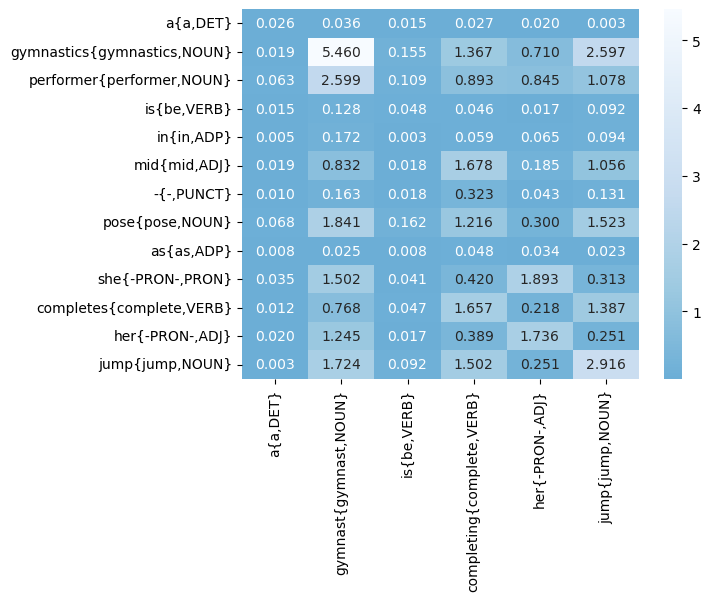

In [52]:
sns.heatmap(mal1, center=0, cmap='Blues_r', annot=True, fmt='.3f')

In [58]:
Matriz_p=fpar.iloc[0].Dot1
Texto_p=fpar.iloc[0].Text
hipotesis_p=fpar.iloc[0].Hipotesis
print(len(Texto_p),Texto_p)
print(len(hipotesis_p),hipotesis_p)
#Matriz_p

15 ['NULL{null,PROPN}', 'a{a,DET}', 'gymnastics{gymnastics,NOUN}', 'performer{performer,NOUN}', 'is{be,VERB}', 'in{in,ADP}', 'mid{mid,ADJ}', '-{-,PUNCT}', 'pose{pose,NOUN}', 'as{as,ADP}', 'she{-PRON-,PRON}', 'completes{complete,VERB}', 'her{-PRON-,ADJ}', 'jump{jump,NOUN}', '.{.,PUNCT}']
8 ['NULL{null,PROPN}', 'the{the,DET}', 'gymnast{gymnast,NOUN}', 'is{be,VERB}', 'completing{complete,VERB}', 'a{a,DET}', 'jump{jump,NOUN}', '.{.,PUNCT}']


In [70]:
paraf_m=pd.DataFrame(Matriz_p[1:len(Texto_p)-1,1:len(hipotesis_p)-1],columns=hipotesis_p[1:-1],index=Texto_p[1:-1])
paraf_m

,"the{the,DET}","gymnast{gymnast,NOUN}","is{be,VERB}","completing{complete,VERB}","a{a,DET}","jump{jump,NOUN}"
"a{a,DET}",0.002669,0.035673,0.014831,0.027262,0.026112,0.003312
"gymnastics{gymnastics,NOUN}",0.001785,5.460130,0.155071,1.366836,0.019398,2.596856
"performer{performer,NOUN}",0.003013,2.599153,0.108695,0.893174,0.062961,1.078483
"is{be,VERB}",0.000754,0.128460,0.048234,0.046225,0.014831,0.091898
"in{in,ADP}",0.015836,0.172404,0.003406,0.059488,0.005198,0.094432
"mid{mid,ADJ}",0.006094,0.831866,0.018480,1.677552,0.018546,1.055878
"-{-,PUNCT}",0.000000,0.162828,0.017737,0.323433,0.009550,0.130850
"pose{pose,NOUN}",0.016398,1.840852,0.162025,1.216048,0.068326,1.522866
"as{as,ADP}",0.002043,0.025219,0.007620,0.048086,0.008247,0.023488
"she{-PRON-,PRON}",0.001009,1.501837,0.041299,0.419826,0.034938,0.312875


<AxesSubplot:>

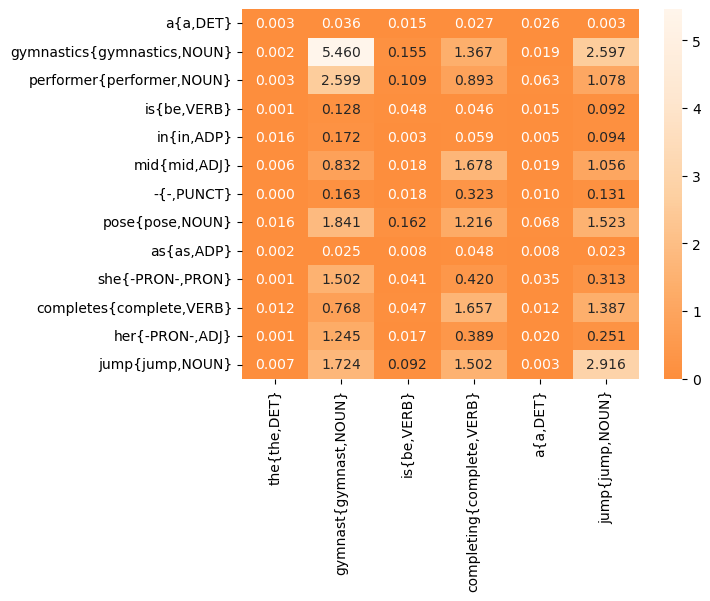

In [71]:
sns.heatmap(paraf_m, center=0, cmap='Oranges_r', annot=True, fmt='.3f')

In [44]:
f.Paraphrase[1]

1

# Procesar todos los archivos para obtener las etiquetas originales y las predicciones

In [36]:
# Procesar los archivos obtenidos para procesarlos y tener un nuevo archivo de las etiquetas originales vs etiquetas de predicción
for e in a:
    df_prediction=pd.read_pickle(e)
    temp=df_prediction.copy()
    df_prediction.assign(predicted_label="")
    df_prediction.assign(gold_label="")
    for index,strings in temp.iterrows():
        p_e=mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        g_e=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])
        df_prediction.at[index,'predicted_label']=p_e
        df_prediction.at[index,'gold_label']=g_e
    df_prediction.to_pickle(e)

ValueError: Invalid file path or buffer object type: <class 'numpy.int32'>

In [12]:
a[0]

'data/Only_training_hipotesis_salida\\pTEST_new_0.05_0.csv.pickle'

# Ya se tiene para todos los muestreos las etiquetas originales vs las predichas

In [13]:
new_data = {'Docs' : [], 'Total' : [], 'Total Entailment' : [], 'Total Entailment (E)' : [],
             'Total Entailment (N)' : [], 'Total Entailment (C)' : [], 'Total Neutral' : [],
             'Total Neutral (N)' : [], 'Total Neutral (E)' : [], 'Total Neutral (C)' : [],
             'Total Contradiction' : [],'Total Contradiction (C)' : [],'Total Contradiction (E)' : [],
             'Total Contradiction (N)' : [], 'grupo': [], 'parafraseo': []}
for e in a:
    df_predictionP=pd.read_pickle(e)
    for p in [0,1]:
        df_prediction=df_predictionP[df_predictionP["Paraphrase"]==p]
        c_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='entailment')].shape[0]
        cn_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='neutral')].shape[0]
        cc_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='contradiction')].shape[0]
        t_entailment=df_prediction[df_prediction['gold_label']=='entailment'].shape[0]
        c_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='neutral')].shape[0]
        ce_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='entailment')].shape[0]
        cc_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='contradiction')].shape[0]
        t_neutral=df_prediction[df_prediction['gold_label']=='neutral'].shape[0]
        c_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='contradiction')].shape[0]
        ce_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='entailment')].shape[0]
        cn_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='neutral')].shape[0]
        t_contradiction=df_prediction[df_prediction['gold_label']=='contradiction'].shape[0]
        new_data['Docs'].append(e)
        new_data['Total'].append(df_prediction.shape[0])
        new_data['Total Entailment'].append(t_entailment)
        new_data['Total Entailment (E)'].append(c_entailment)
        new_data['Total Entailment (N)'].append(cn_entailment)
        new_data['Total Entailment (C)'].append(cc_entailment)
        new_data['Total Neutral'].append(t_neutral)
        new_data['Total Neutral (E)'].append(ce_neutral)
        new_data['Total Neutral (N)'].append(c_neutral)
        new_data['Total Neutral (C)'].append(cc_neutral)
        new_data['Total Contradiction'].append(t_contradiction)
        new_data['Total Contradiction (E)'].append(ce_contradiction)
        new_data['Total Contradiction (N)'].append(cn_contradiction)
        new_data['Total Contradiction (C)'].append(c_contradiction)
        new_data['grupo'].append(float(e.split('_')[5])*100)
        new_data['parafraseo'].append(p)
new_data=pd.DataFrame(new_data)
new_data.to_csv("data/Only_training_hipotesis_salida/predictions/Fresultados.csv")

In [13]:
new_data = pd.read_csv("data/Only_training_hipotesis_salida/predictions/Fresultados.csv")
new_data

,Unnamed: 0,Docs,Total,Total Entailment,Total Entailment (E),Total Entailment (N),Total Entailment (C),Total Neutral,Total Neutral (N),Total Neutral (E),Total Neutral (C),Total Contradiction,Total Contradiction (C),Total Contradiction (E),Total Contradiction (N),grupo,parafraseo
0,0,data/Only_training_hipotesis_salida\pTEST_new_...,340,101,91,8,2,135,104,16,15,104,87,0,17,5.0,0
1,1,data/Only_training_hipotesis_salida\pTEST_new_...,340,101,86,10,5,135,103,15,17,104,85,3,16,5.0,1
2,2,data/Only_training_hipotesis_salida\pTEST_new_...,340,104,89,12,3,107,89,10,8,129,103,6,20,5.0,0
3,3,data/Only_training_hipotesis_salida\pTEST_new_...,340,104,87,11,6,107,81,13,13,129,103,6,20,5.0,1
4,4,data/Only_training_hipotesis_salida\pTEST_new_...,340,108,100,5,3,124,108,6,10,108,91,6,11,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,237,data/Only_training_hipotesis_salida\pTEST_new_...,5455,1679,1383,227,69,1972,1545,209,218,1804,1488,90,226,80.0,1
238,238,data/Only_training_hipotesis_salida\pTEST_new_...,5455,1721,1495,184,42,1969,1624,185,160,1765,1497,66,202,80.0,0
239,239,data/Only_training_hipotesis_salida\pTEST_new_...,5455,1721,1402,248,71,1969,1539,206,224,1765,1448,90,227,80.0,1
240,240,data/Only_training_hipotesis_salida\pTEST_new_...,6819,2120,1859,213,48,2435,2011,238,186,2264,1918,88,258,100.0,0


# obtener el rendimiento por parafrasis o no

In [15]:
results = new_data.copy()
results=results.assign(error=0.0)
results=results.assign(accuracy=0.0)

In [16]:
temp=results.copy()
for index, strings2 in temp.iterrows():
    total=int(strings2[2])
    correctos = int(strings2[4]) + int(strings2[8]) + int(strings2[12])
    incorrectos = int(strings2[5]) + int(strings2[6]) + int(strings2[9]) + int(strings2[10]) + int(strings2[13]) + int(strings2[14])
    results.at[index,"error"]=incorrectos/total
    results.at[index,"accuracy"]=correctos/total

In [17]:
parafrasis_results = results[results["parafraseo"]==1]

In [18]:
import numpy as np

In [19]:
accuracy_g=[]
parafrasis_results_5 = parafrasis_results[parafrasis_results["grupo"]==5.0]
accuracy_g.append(parafrasis_results_5.accuracy.mean())
parafrasis_results_10 = parafrasis_results[parafrasis_results["grupo"]==10.0]
accuracy_g.append(parafrasis_results_10.accuracy.mean())
parafrasis_results_15 = parafrasis_results[parafrasis_results["grupo"]==15.0]
accuracy_g.append(parafrasis_results_15.accuracy.mean())
parafrasis_results_20 = parafrasis_results[parafrasis_results["grupo"]==20.0]
accuracy_g.append(parafrasis_results_20.accuracy.mean())
parafrasis_results_50 = parafrasis_results[parafrasis_results["grupo"]==50.0]
accuracy_g.append(parafrasis_results_50.accuracy.mean())
parafrasis_results_80 = parafrasis_results[parafrasis_results["grupo"]==80.0]
accuracy_g.append(parafrasis_results_80.accuracy.mean())
parafrasis_results_100 = parafrasis_results[parafrasis_results["grupo"]==100.0]
accuracy_g.append(parafrasis_results_100.accuracy.mean())
print(np.mean(accuracy_g))

0.804835057220507


<AxesSubplot:title={'center':'accuracy'}, xlabel='[grupo]'>

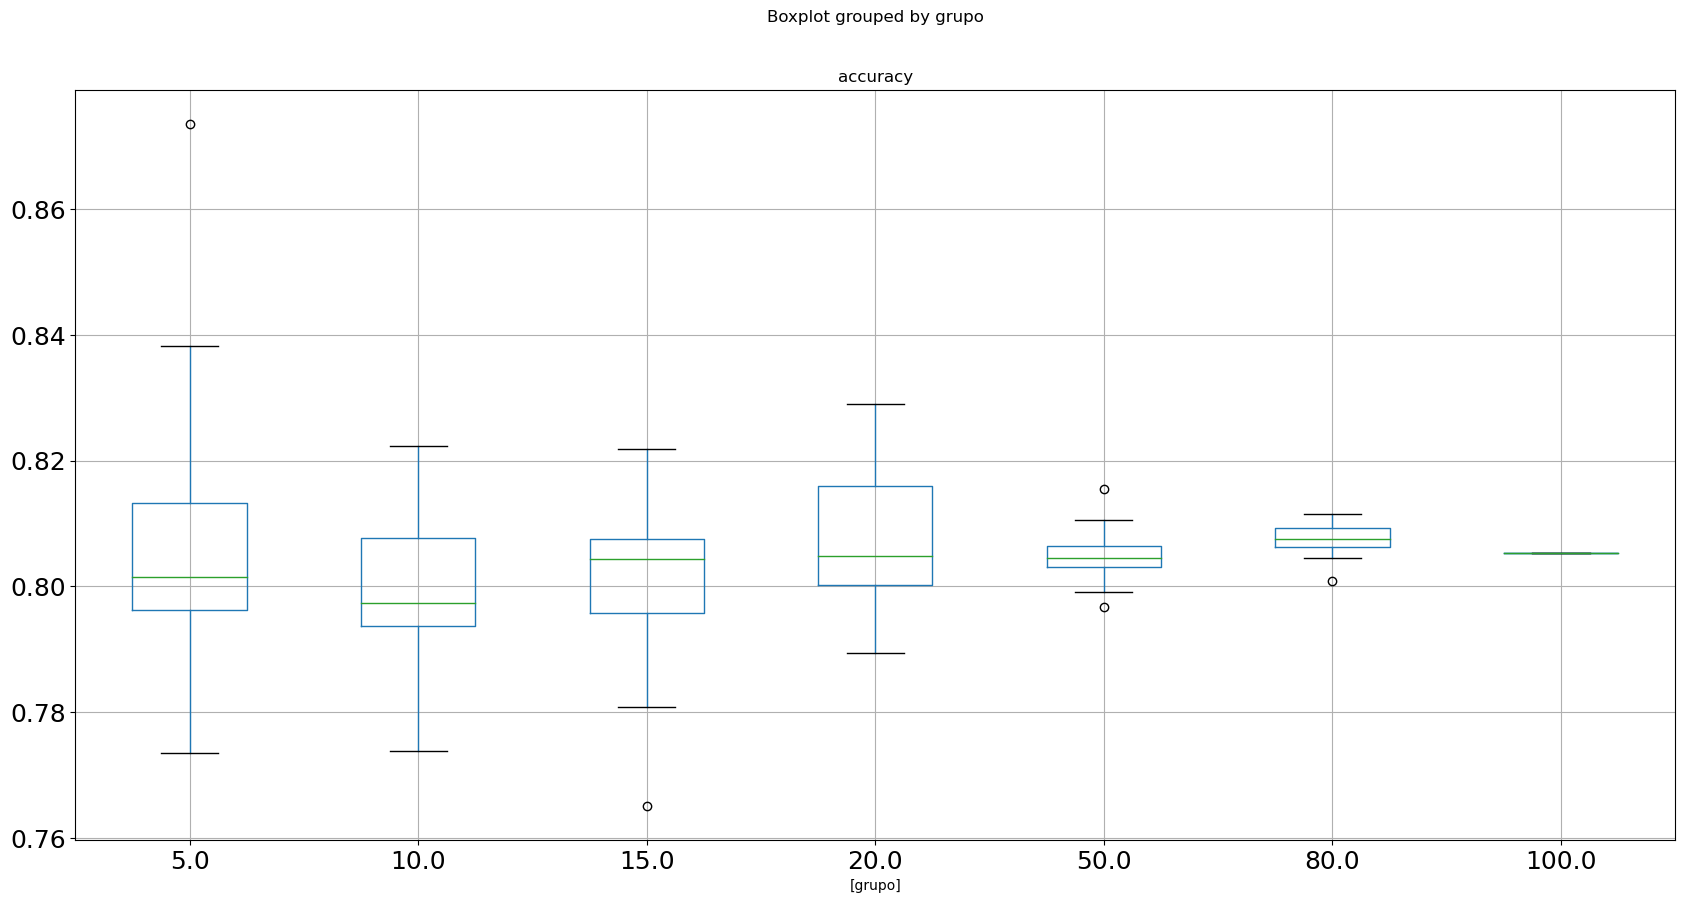

In [22]:
parafrasis_results.boxplot(column=['accuracy'],by=['grupo'],fontsize=18,figsize=(20,10),)

In [15]:
parafrasis_results

,Unnamed: 0,Docs,Total,Total Entailment,Total Entailment (E),Total Entailment (N),Total Entailment (C),Total Neutral,Total Neutral (N),Total Neutral (E),Total Neutral (C),Total Contradiction,Total Contradiction (C),Total Contradiction (E),Total Contradiction (N),grupo,parafraseo,error,accuracy
1,1,data/Only_training_hipotesis_salida\pTEST_new_...,340,101,86,10,5,135,103,15,17,104,85,3,16,5.0,1,0.194118,0.805882
3,3,data/Only_training_hipotesis_salida\pTEST_new_...,340,104,87,11,6,107,81,13,13,129,103,6,20,5.0,1,0.202941,0.797059
5,5,data/Only_training_hipotesis_salida\pTEST_new_...,340,108,91,13,4,124,102,6,16,108,87,9,12,5.0,1,0.176471,0.823529
7,7,data/Only_training_hipotesis_salida\pTEST_new_...,340,103,82,17,4,133,103,11,19,104,90,3,11,5.0,1,0.191176,0.808824
9,9,data/Only_training_hipotesis_salida\pTEST_new_...,340,100,79,14,7,110,85,13,12,130,108,5,17,5.0,1,0.200000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,data/Only_training_hipotesis_salida\pTEST_new_...,5455,1706,1392,243,71,1941,1526,207,208,1808,1483,92,233,80.0,1,0.193217,0.806783
235,235,data/Only_training_hipotesis_salida\pTEST_new_...,5455,1703,1400,239,64,1934,1508,211,215,1818,1495,95,228,80.0,1,0.192851,0.807149
237,237,data/Only_training_hipotesis_salida\pTEST_new_...,5455,1679,1383,227,69,1972,1545,209,218,1804,1488,90,226,80.0,1,0.190467,0.809533
239,239,data/Only_training_hipotesis_salida\pTEST_new_...,5455,1721,1402,248,71,1969,1539,206,224,1765,1448,90,227,80.0,1,0.195417,0.804583


array([[<AxesSubplot:title={'center':'Total'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Entailment'}, xlabel='[grupo, parafraseo]'>],
       [<AxesSubplot:title={'center':'Total Neutral'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Contradiction'}, xlabel='[grupo, parafraseo]'>]],
      dtype=object)

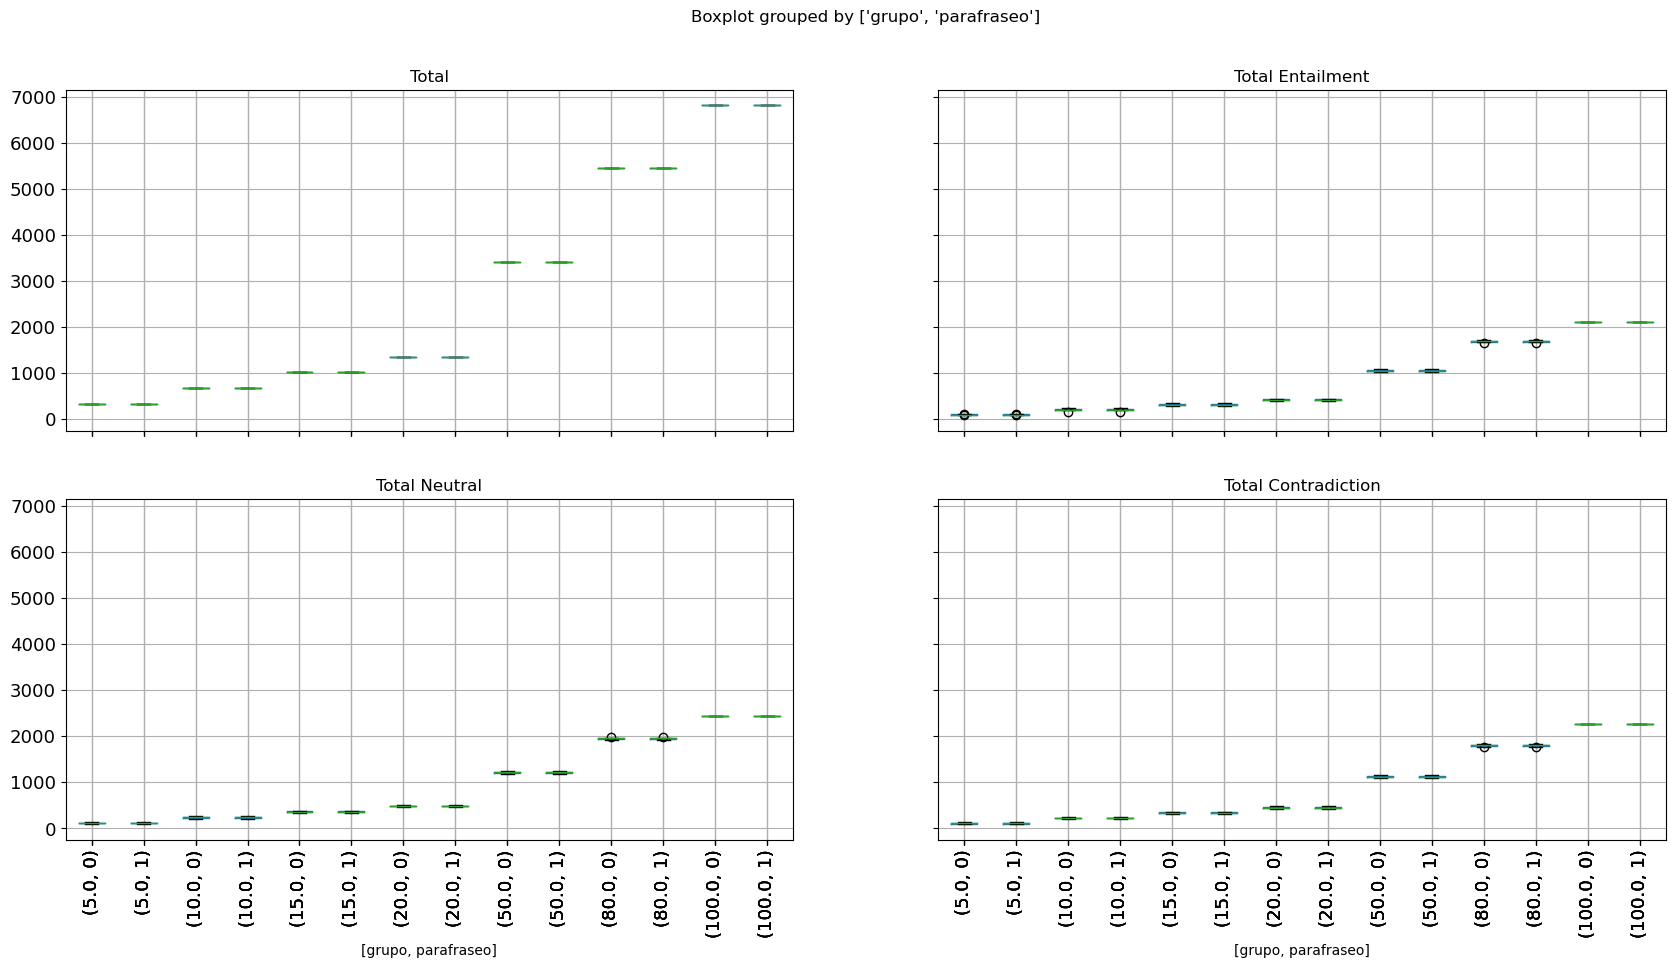

In [15]:
new_data.boxplot(column=['Total', 'Total Entailment','Total Neutral','Total Contradiction'],by=['grupo', 'parafraseo'],fontsize=13,figsize=(20,10),rot=90)
#new_data.boxplot()

array([[<AxesSubplot:title={'center':'Total Entailment'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (E)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Entailment (N)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (C)'}, xlabel='grupo'>]],
      dtype=object)

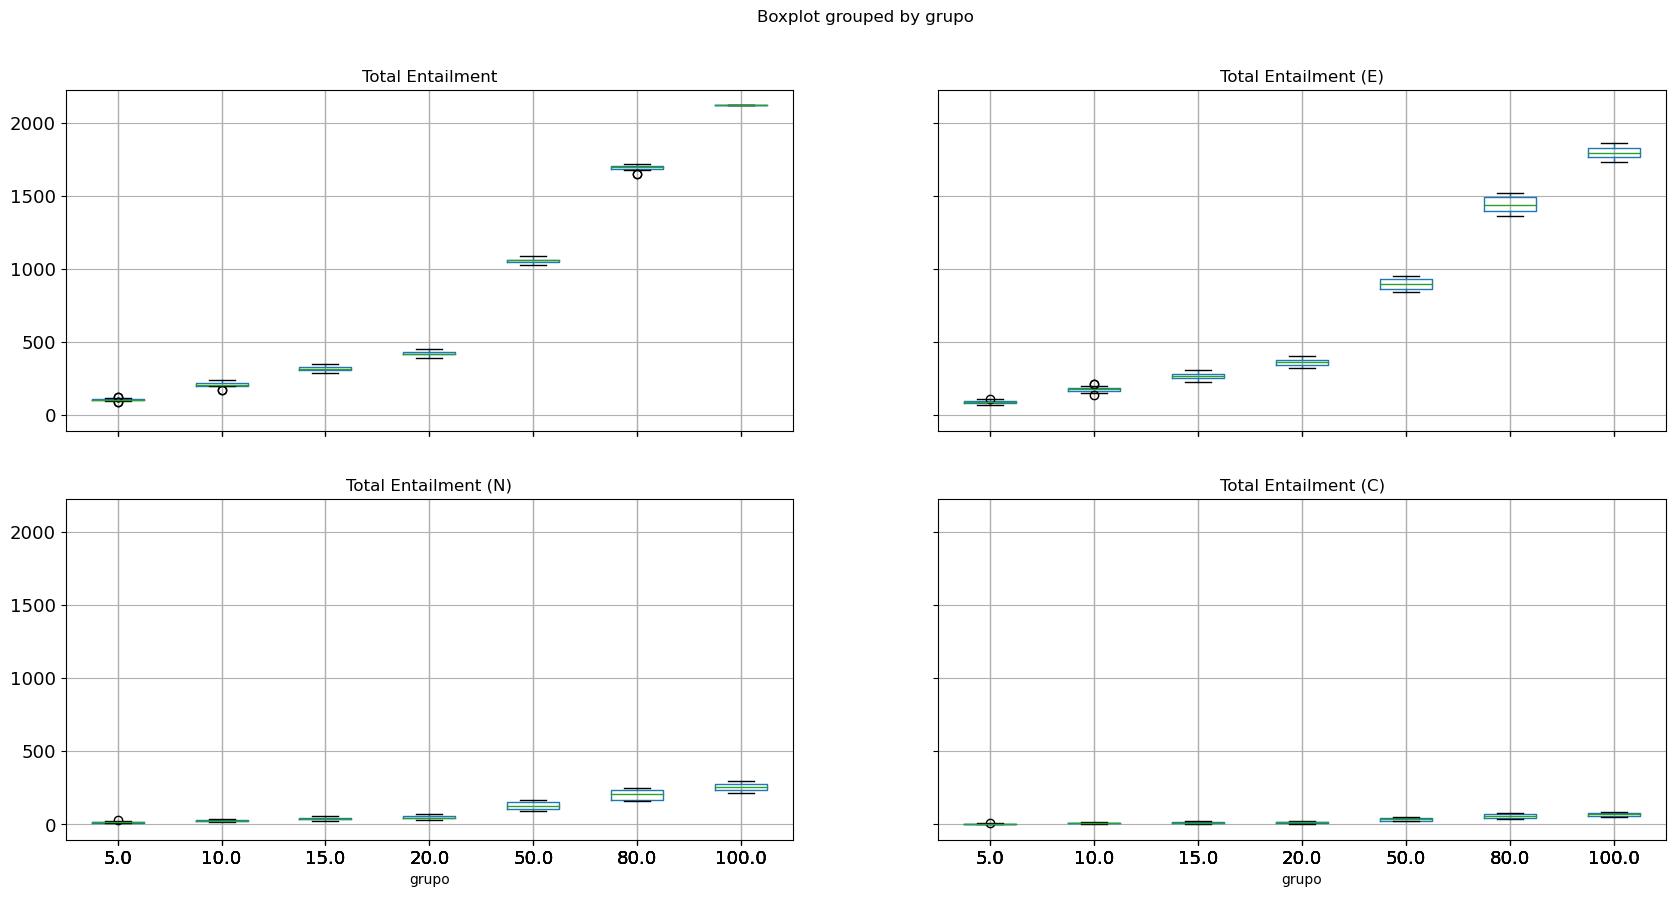

In [16]:
new_data.boxplot(column=['Total Entailment','Total Entailment (E)','Total Entailment (N)','Total Entailment (C)',],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Neutral'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (N)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Neutral (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (C)'}, xlabel='grupo'>]],
      dtype=object)

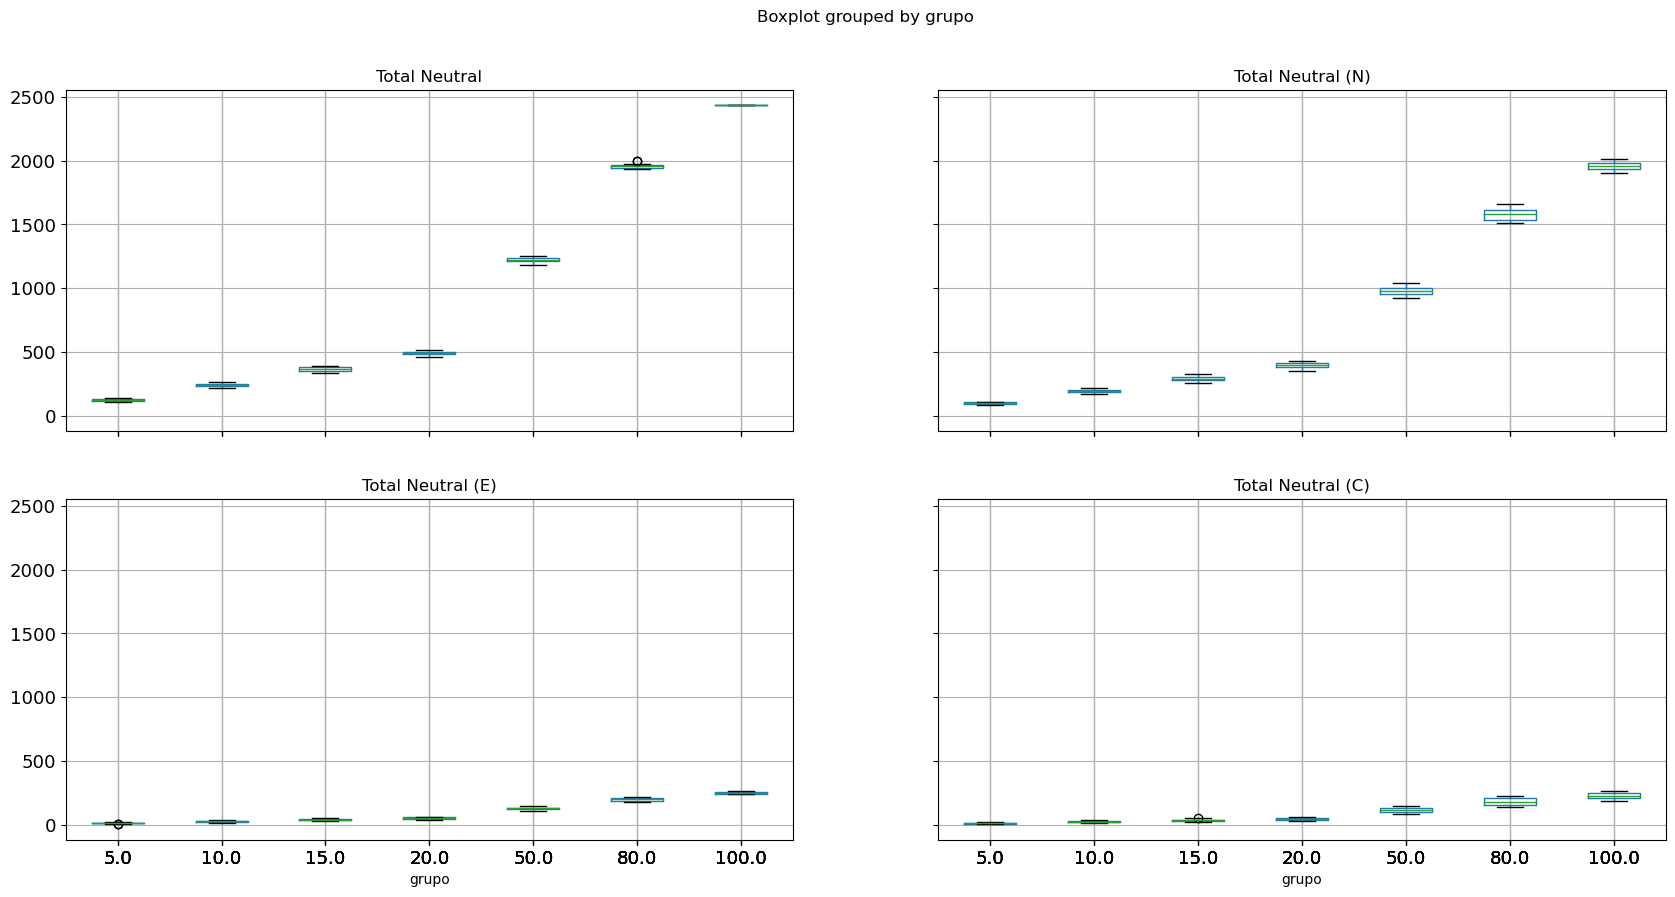

In [17]:
new_data.boxplot(column=['Total Neutral','Total Neutral (N)','Total Neutral (E)','Total Neutral (C)',],by='grupo',fontsize=13,figsize=(20,10))

<AxesSubplot:title={'center':'Total Contradiction'}, xlabel='grupo'>

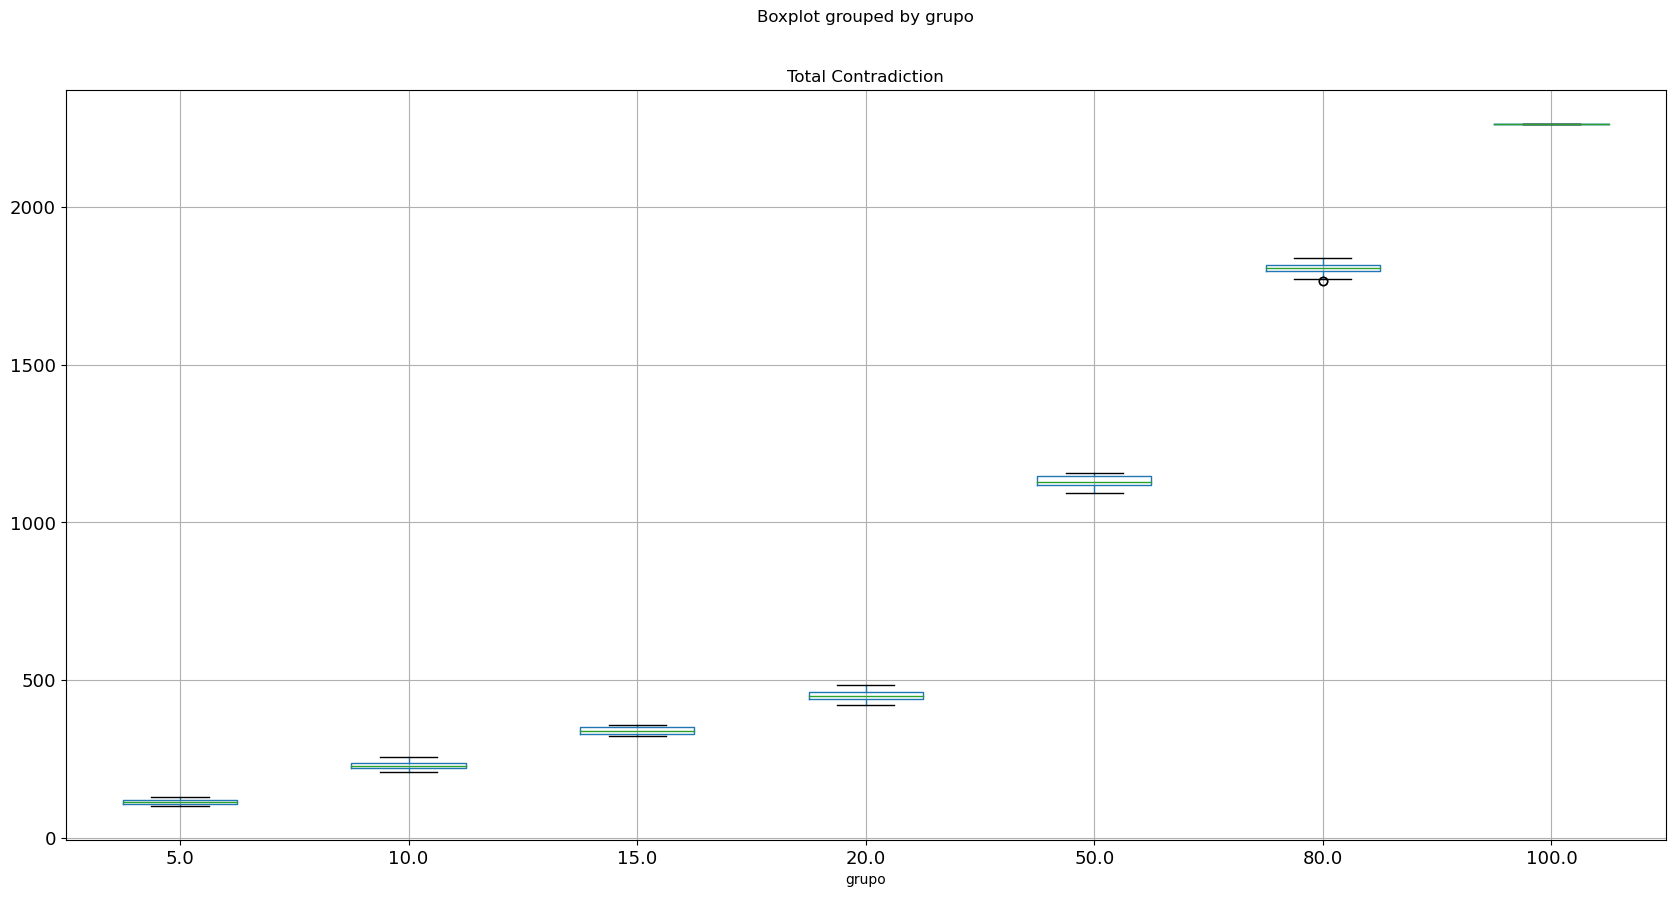

In [18]:
new_data.boxplot(column=['Total Contradiction'],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Contradiction'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (C)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Contradiction (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (N)'}, xlabel='grupo'>]],
      dtype=object)

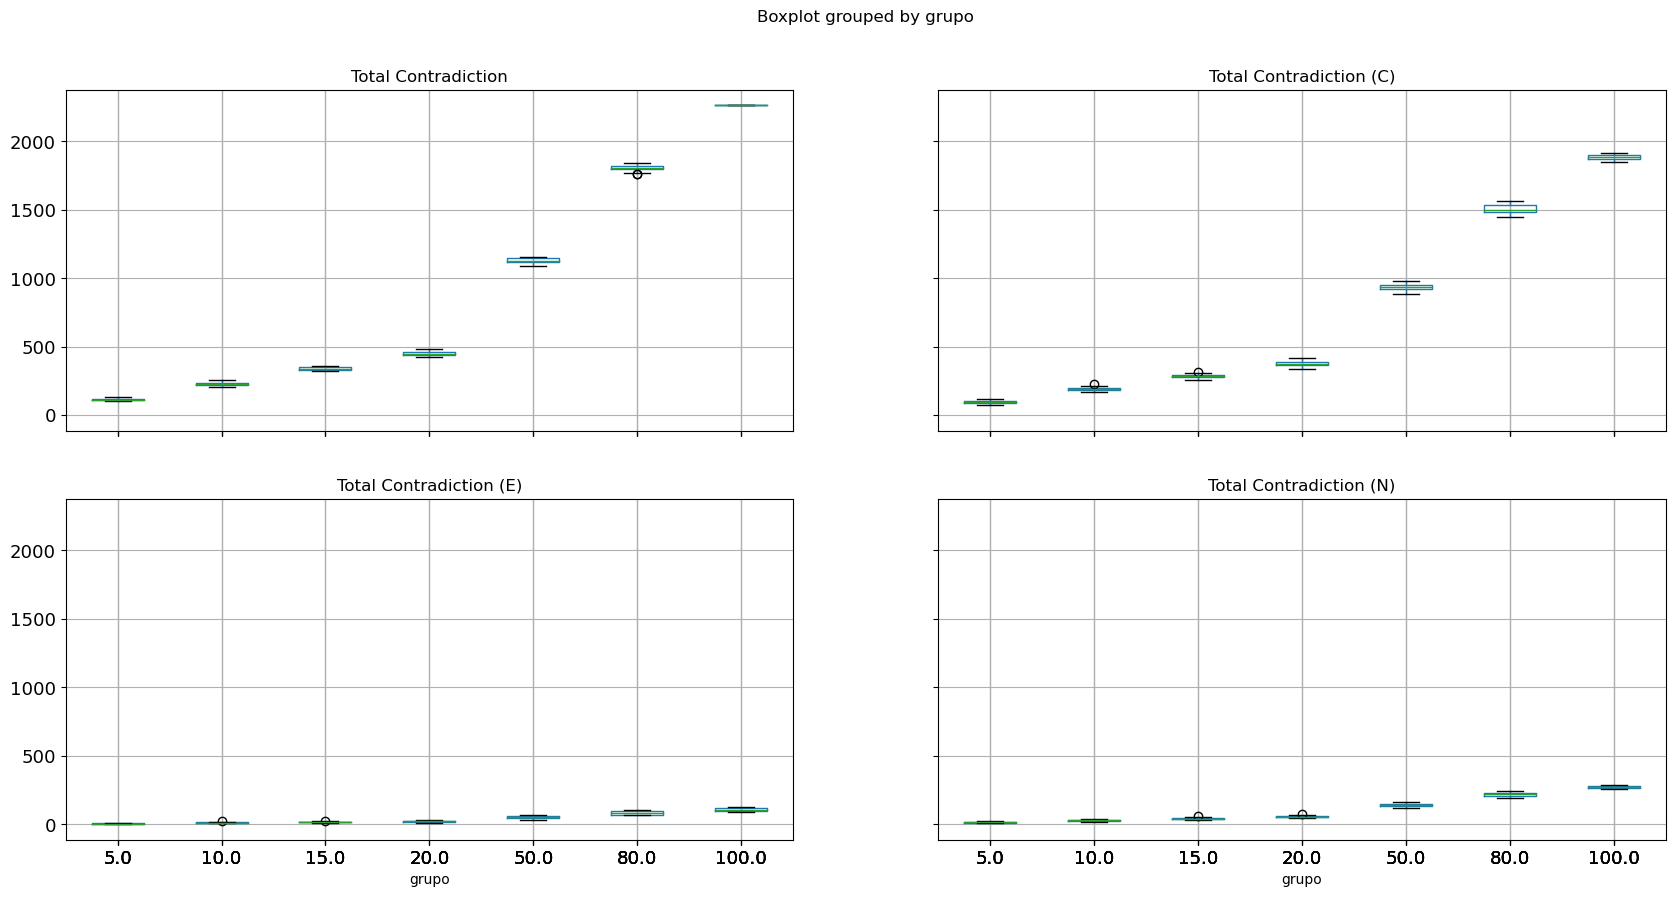

In [19]:
new_data.boxplot(column=['Total Contradiction','Total Contradiction (C)','Total Contradiction (E)','Total Contradiction (N)',],by='grupo',fontsize=13,figsize=(20,10))